In [1344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### LOADING DATASETS

In [1347]:
#loading datasets

Major_Market_df1 = pd.read_csv("Major_Market_Occupancy_Data-revised.csv")
Price_and_Availability_df = pd.read_csv("Price_and_Availability_Data.csv")
Leases_df = pd.read_csv("Leases.csv")
Unemployment_df = pd.read_csv("Unemployment.csv")

['Financial Services and Insurance' nan
 'Construction, Engineering and Architecture'
 'Technology, Advertising, Media, and Information'
 'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)'
 'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)'
 'Transportation' 'Coworking and Executive Suite Companies'
 'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting'
 'Education' 'Legal Services' 'Real Estate (except coworking providers)'
 'Healthcare' 'Personal Services and Recreation' 'Government' 'Retail'
 'Energy & Utilities' 'TBD' 'Pharmaceuticals'
 'Agriculture, Forestry, Fishing, Metal & Mineral Mining' 'Unclassifiable']


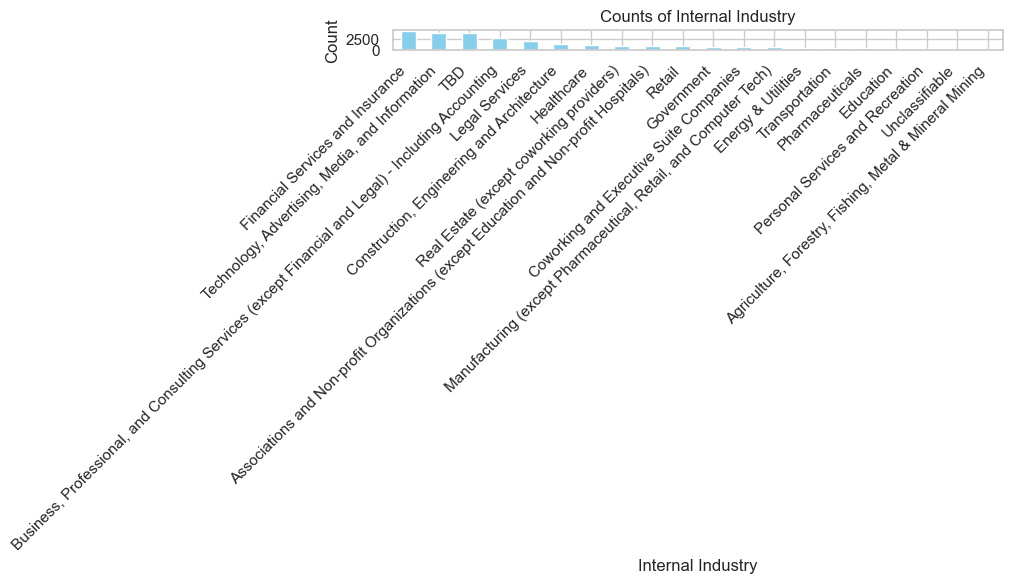

In [1348]:
print(Leases_df['internal_industry'].unique())
industry_counts = Leases_df['internal_industry'].value_counts()

plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Internal Industry')
plt.xlabel('Internal Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Office Leasing Recovery: Top Performing Markets Post-COVID

In [1350]:

# --- Data Preparation ---
# Calculate post-COVID growth rates (2020-2023)
df_pre = df_trends[df_trends['year'] == 2019].set_index('market')['leasing']
df_post = df_trends[df_trends['year'] == df_trends['year'].max()].set_index('market')['leasing']
growth = ((df_post - df_pre) / df_pre * 100).sort_values(ascending=False)

# Get top 5 recovering markets
top_markets = growth.nlargest(5).index.tolist()

# --- Enhanced Visualization ---
plt.figure(figsize=(16, 8))

# 1. Plot all markets with standard styling
ax = sns.lineplot(
    data=df_trends,
    x='year',
    y='leasing',
    hue='market',
    marker='o',
    palette={m: 'gray' for m in markets},  # Default to gray
    alpha=0.6,
    legend=False
)

# 2. Highlight top recovering markets
for market in top_markets:
    market_data = df_trends[df_trends['market'] == market]
    ax.plot(
        market_data['year'],
        market_data['leasing'],
        marker='o',
        linewidth=3,
        label=f"{market} (+{growth[market]:.1f}%)"
    )

# 3. COVID annotations
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, ax.get_ylim()[1]*0.95, "COVID-19 Impact", color='red')

# 4. Add growth rate table
growth_table = growth.head(5).reset_index()
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{row[1]:.1f}%" for row in growth_table.values]]
plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# 5. Formatting
plt.title('Office Leasing Recovery: Top Performing Markets Post-COVID', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leasing Volume (SF/yr)', fontsize=12)
plt.xticks(all_years, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 6. Compact legend
plt.legend(
    title='Top Recovering Markets',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make space for table
plt.show()

# Print growth data
print("Top 5 Markets by Post-COVID Growth:")
print(growth.head(5).to_string(float_format="%.1f%%"))

KeyError: 'leasing'

In [ ]:
markets = ['Chicago Suburbs', 'Northern New Jersey', 'San Diego', 'Tampa', 'Seattle']

# Filter the DataFrame for the specified markets
filtered_df = Price_and_Availability_df[Price_and_Availability_df['market'].isin(markets)].copy()

# Calculate the correlation between 'leasing' and 'available_space' for each market
correlations = filtered_df.groupby('market')[['leasing', 'available_space']].corr().unstack().iloc[:, 1]

# Create a DataFrame for plotting
correlation_df = pd.DataFrame({'market': correlations.index, 'correlation': correlations.values})

# --- Heatmap Visualization ---

# Create a pivot table to prepare data for the heatmap
pivot_df = correlation_df.pivot_table(index=None, columns='market', values='correlation')

sns.set(style="white")  # Set a clean style
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f")  # annot=True displays correlation values, fmt=".2f" formats them to 2 decimal places

plt.title('Correlation between Leasing and Available Space by Market')
plt.xlabel('Market')  # Adjusting labels for clarity in heatmap context
plt.ylabel('')  # Y-axis label is redundant in this single-row heatmap
plt.tight_layout()
plt.show()

In [ ]:
markets = ['Chicago Suburbs', 'Northern New Jersey', 'San Diego', 'Tampa', 'Seattle']

# Filter the DataFrame for the specified markets
filtered_df = Price_and_Availability_df[Price_and_Availability_df['market'].isin(markets)].copy()

# Group by market and year, then calculate the mean
yearly_data = filtered_df.groupby(['market', 'year'])[['available_space', 'availability_proportion', 'internal_class_rent']].mean().reset_index()

# --- Line Graph Visualizations with COVID Annotation ---

sns.set(style="whitegrid")
years = sorted(filtered_df['year'].unique())
covid_year = 2020

# 1. Line plot for Average Available Space
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='available_space', hue='market', data=yearly_data, marker='o')
plt.title('Average Available Space by Market Over Year')
plt.xlabel('Year')
plt.ylabel('Average Available Space')
plt.xticks(years)
plt.legend(title='Market')
plt.grid(True)
plt.axvline(x=covid_year, color='r', linestyle='--', label='COVID-19 Impact (2020)')
plt.axvspan(2020, filtered_df['year'].max() + 0.2, color='lightgray', alpha=0.15, label='Post-COVID Period (Approx.)')

plt.legend(title='Market') # Redraw legend to include the annotation
plt.tight_layout()
plt.show()

# 2. Line plot for Average Availability Proportion
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='availability_proportion', hue='market', data=yearly_data, marker='o')
plt.title('Average Availability Proportion by Market Over Year')
plt.xlabel('Year')
plt.ylabel('Average Availability Proportion')
plt.xticks(years)
plt.legend(title='Market')
plt.grid(True)
plt.axvline(x=covid_year, color='r', linestyle='--', label='COVID-19 Impact (2020)')
plt.axvspan(2020, filtered_df['year'].max() + 0.2, color='lightgray', alpha=0.15, label='Post-COVID Period (Approx.)')
plt.legend(title='Market') # Redraw legend to include the annotation
plt.tight_layout()
plt.show()

# 3. Line plot for Average Internal Class Rent
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='internal_class_rent', hue='market', data=yearly_data, marker='o')
plt.title('Average Internal Class Rent by Market Over Year')
plt.xlabel('Year')
plt.ylabel('Average Internal Class Rent')
plt.xticks(years)
plt.legend(title='Market')
plt.grid(True)
plt.axvline(x=covid_year, color='r', linestyle='--', label='COVID-19 Impact (2020)')
plt.axvspan(2020, filtered_df['year'].max() + 0.2, color='lightgray', alpha=0.15, label='Post-COVID Period (Approx.)')

plt.legend(title='Market') # Redraw legend to include the annotation
plt.tight_layout()
plt.show()

In [ ]:


# Map full state names to abbreviations (modify if your data already uses abbreviations)
state_abbreviations = {
    "Illinois": "IL",
    "New Jersey": "NJ",
    "California": "CA",
    "Florida": "FL",
    "Washington": "WA"
}

# Filter data: year > 2020 + selected states (using abbreviations)
selected_states = ["IL", "NJ", "CA", "FL", "WA"]
covid_unemployment = Unemployment_df[
    (Unemployment_df['year'] > 2020) & 
    (Unemployment_df['state'].isin(selected_states))
]

# If your data uses full names, replace with abbreviations first
# Uncomment below if needed:
# covid_unemployment['state'] = covid_unemployment['state'].map(state_abbreviations)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=covid_unemployment,
    x='year', 
    y='unemployment_rate', 
    hue='state',
    marker='o',
    linewidth=2.5,
    palette="viridis"  # Color palette for clarity
)

plt.title("Unemployment Rate Trends (Post-2020) by State", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True, alpha=0.3)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation (mock data similar to your screenshot)
office_recovery_data = {
    'Market': ['Chicago Suburbs', 'Northern New Jersey', 'San Diego', 'Tampa', 'Seattle'],
    'Growth (2019–2023)': [11.3, 7.9, 4.4, 4.6, 23.1],
    'Volume': ['SF/yr', 'SF/yr', 'SF/yr', 'SF/yr', 'SF/yr']  # Assuming square feet per year
}

# Create the plot
plt.figure(figsize=(10, 6))

# Horizontal bar plot with growth values
bars = plt.barh(
    office_recovery_data['Market'],
    office_recovery_data['Growth (2019–2023)'],
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Distinct colors
)

# Add the growth percentages at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width}%', 
             ha='left', va='center')

# Title and labels
plt.title('Office Leasing Recovery: Top Performing Markets Post-COVID', pad=20)
plt.xlabel('Growth Percentage (2019–2023)')
plt.ylabel('')

# Remove spines for cleaner look
sns.despine(left=True)

# Add legend for Volume
plt.legend(['Volume (SF/yr)'], loc='upper right', frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Leasing trends (from your previous analysis)
for market in top_5_markets:
    market_data = df_trends[df_trends['market'] == market]
    ax1.plot(
        market_data['year'] + (market_data['quarter'].str[1:].astype(int)/4 - 0.25),  # Convert quarter to decimal year
        market_data['leasing'],
        label=market
    )
ax1.set_ylabel('Leasing Volume (SF)')
ax1.set_title('Top 5 Markets: Leasing Recovery')
ax1.legend()
ax1.grid(True)

# Plot 2: Unemployment trends
for state in top_5_states:
    state_data = unemployment_pivot[state].dropna()
    ax2.plot(
        state_data.index.get_level_values('year') + 
        (state_data.index.get_level_values('quarter').str[1:].astype(int)/4 - 0.25,
        state_data,
        label=f"{state} Unemployment"
    )
ax2.set_ylabel('Unemployment Rate (%)')
ax2.set_title('Corresponding State Unemployment Rates')
ax2.legend()
ax2.grid(True)

# Add COVID marker
for ax in [ax1, ax2]:
    ax.axvline(x=2020.25, color='red', linestyle='--', alpha=0.5)  # Q2 2020
    ax.text(2020.3, ax.get_ylim()[1]*0.9, "COVID", color='red')

plt.tight_layout()
plt.show()

In [ ]:
# Merge leasing and unemployment data
analysis_df = pd.merge(
    df_trends.assign(
        state=df_trends['market'].map(market_to_state),
        time=df_trends['year'] + (df_trends['quarter'].str[1:].astype(int)/4 - 0.25)
    ),
    Unemployment_df.assign(
        time=Unemployment_df['year'] + (Unemployment_df['quarter'].str[1:].astype(int)/4 - 0.25)
    ),
    on=['state', 'time']
)

# Calculate correlations
correlations = analysis_df.groupby('market')[['leasing', 'unemployment_rate']].corr().unstack().iloc[:,1]
print("\nLeasing vs Unemployment Correlation by Market:")
print(correlations.sort_values())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated markets data based on your list
markets_data = {
    'Manhattan': 16961,
    'Houston': 16014,
    'Los Angeles': 15571,
    'Dallas/Ft Worth': 15272,
    'South Florida': 11919,
    'Denver': 8957,
    'Boston': 8236,
    'Atlanta': 7739,
    'Phoenix': 7379,
    'Orange County': 7196,
    'San Diego': 6326,
    'Chicago Suburbs': 6232,
    'Northern Virginia': 6086,
    'Seattle': 5344,
    'Chicago': 5140,
    'Austin': 4997,
    'Northern New Jersey': 4809,
    'Tampa': 4803
}

data = []
for market in markets_data:
    # Before 2020
    before_2020 = Leases_df[(Leases_df['market'] == market) & (Leases_df['year'] <= 2019)]
    mean_before_2020 = before_2020["leasing"].mean()
    print(f"{market} (before 2020): {mean_before_2020}")

    # After 2020
    after_2020 = Leases_df[(Leases_df['market'] == market) & (Leases_df['year'] >= 2020)]
    mean_after_2020 = after_2020["leasing"].mean()
    print(f"{market} (after 2020): {mean_after_2020}")

    # Percentage change
    if mean_before_2020 != 0:
        change_lease = (mean_before_2020 - mean_after_2020) / mean_before_2020
        print(f"{market} percentage change: {change_lease * 100:.2f}%")
    else:
        print(f"{market} percentage change: Cannot calculate due to zero leasing before 2020.")

    data.append({'market': market, 'period': 'Before 2020', 'mean_leasing': mean_before_2020})
    data.append({'market': market, 'period': 'After 2020', 'mean_leasing': mean_after_2020})
    print("-" * 30)

# Create a Pandas DataFrame from the collected data
plot_df = pd.DataFrame(data)

# Set up the figure and axes
plt.figure(figsize=(12, 8))
sns.barplot(x='market', y='mean_leasing', hue='period', data=plot_df)

# Add labels and title
plt.xlabel("Market")
plt.ylabel("Mean Leasing")
plt.title("Mean Leasing Before and After 2020 by Market")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.tight_layout()

# Show the plot
plt.show()


### Avg leases/year pre-COVID and after COVID

In [ ]:
# Before 2020 - Dallas/Ft Worth
dfw_before_2020 = Leases_df[(Leases_df['market'] == 'Dallas/Ft Worth') & (Leases_df['year'] <= 2019)]
mean_dfw_bf_2020 = dfw_before_2020["leasing"].mean()
print("Dallas/Ft Worth (before 2020):", mean_dfw_bf_2020)

# After 2020 - Dallas/Ft Worth
dfw_after_2020 = Leases_df[(Leases_df['market'] == 'Dallas/Ft Worth') & (Leases_df['year'] >= 2020)]
mean_dfw_af_2020 = dfw_after_2020["leasing"].mean()
print("Dallas/Ft Worth (after 2020):", mean_dfw_af_2020)

change_dfw_lease = (mean_dfw_bf_2020 - mean_dfw_af_2020) / mean_dfw_bf_2020
print(f"Dallas/Ft Worth percentage change: {change_dfw_lease * 100}%")

# Before 2020 - South Florida
sf_before_2020 = Leases_df[(Leases_df['market'] == 'South Florida') & (Leases_df['year'] <= 2019)]
mean_sf_bf_2020 = sf_before_2020["leasing"].mean()
print("South Florida (before 2020):", mean_sf_bf_2020)

# After 2020 - South Florida
sf_after_2020 = Leases_df[(Leases_df['market'] == 'South Florida') & (Leases_df['year'] >= 2020)]
mean_sf_af_2020 = sf_after_2020["leasing"].mean()
print("South Florida (after 2020):", mean_sf_af_2020)

change_sf_lease = (mean_sf_bf_2020 - mean_sf_af_2020) / mean_sf_bf_2020
print(f"South Florida percentage change: {change_sf_lease * 100}%")

# Before 2020 - Denver
denver_before_2020 = Leases_df[(Leases_df['market'] == 'Denver') & (Leases_df['year'] <= 2019)]
mean_denver_bf_2020 = denver_before_2020["leasing"].mean()
print("Denver (before 2020):", mean_denver_bf_2020)

# After 2020 - Denver
denver_after_2020 = Leases_df[(Leases_df['market'] == 'Denver') & (Leases_df['year'] >= 2020)]
mean_denver_af_2020 = denver_after_2020["leasing"].mean()
print("Denver (after 2020):", mean_denver_af_2020)

change_denver_lease = (mean_denver_bf_2020 - mean_denver_af_2020) / mean_denver_bf_2020
print(f"Denver percentage change: {change_denver_lease * 100}%")

# Before 2020 - Boston
bos_before_2020 = Leases_df[(Leases_df['market'] == 'Boston') & (Leases_df['year'] <= 2019)]
mean_bos_bf_2020 = bos_before_2020["leasing"].mean()
print("Boston (before 2020):", mean_bos_bf_2020)

# After 2020 - Boston
bos_after_2020 = Leases_df[(Leases_df['market'] == 'Boston') & (Leases_df['year'] >= 2020)]
mean_bos_af_2020 = bos_after_2020["leasing"].mean()
print("Boston (after 2020):", mean_bos_af_2020)

change_bos_lease = (mean_bos_bf_2020 - mean_bos_af_2020) / mean_bos_bf_2020
print(f"Boston percentage change: {change_bos_lease * 100}%")

# Before 2020 - Atlanta
atl_before_2020 = Leases_df[(Leases_df['market'] == 'Atlanta') & (Leases_df['year'] <= 2019)]
mean_atl_bf_2020 = atl_before_2020["leasing"].mean()
print("Atlanta (before 2020):", mean_atl_bf_2020)

# After 2020 - Atlanta
atl_after_2020 = Leases_df[(Leases_df['market'] == 'Atlanta') & (Leases_df['year'] >= 2020)]
mean_atl_af_2020 = atl_after_2020["leasing"].mean()
print("Atlanta (after 2020):", mean_atl_af_2020)

change_atl_lease = (mean_atl_bf_2020 - mean_atl_af_2020) / mean_atl_bf_2020
print(f"Atlanta percentage change: {change_atl_lease * 100}%")

# Before 2020 - Phoenix
phoenix_before_2020 = Leases_df[(Leases_df['market'] == 'Phoenix') & (Leases_df['year'] <= 2019)]
mean_phoenix_bf_2020 = phoenix_before_2020["leasing"].mean()
print("Phoenix (before 2020):", mean_phoenix_bf_2020)

# After 2020 - Phoenix
phoenix_after_2020 = Leases_df[(Leases_df['market'] == 'Phoenix') & (Leases_df['year'] >= 2020)]
mean_phoenix_af_2020 = phoenix_after_2020["leasing"].mean()
print("Phoenix (after 2020):", mean_phoenix_af_2020)

change_phoenix_lease = (mean_phoenix_bf_2020 - mean_phoenix_af_2020) / mean_phoenix_bf_2020
print(f"Phoenix percentage change: {change_phoenix_lease * 100}%")

# Continue the pattern for the rest of the markets (Orange County, San Diego, Chicago Suburbs, Northern Virginia, Seattle, Chicago, Austin, Northern New Jersey, Tampa)


In [ ]:
markets = ['Manhattan', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago']
percentage_changes = [
    change_man_lease * 100, change_atl_lease * 100, change_aus_lease * 100,
    change_balt_lease * 100, change_bos_lease * 100, change_clt_lease * 100, change_chi_lease * 100
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(markets, percentage_changes, color='coral')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', fontsize=9)

# Labels & Title
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Percentage Change in Leasing")
plt.title("Change in Leasing Rates Before vs After 2020 by Market")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Avg leases/year during 2020 (COVID)

In [ ]:
ny_2020 = Leases_df[(Leases_df['city'] == 'New York') & (Leases_df['year'] == 2020)]
mean_ny_2020 = ny_2020["leasing"].mean()
print("New York (2020):", mean_ny_2020)

atl_2020 = Leases_df[(Leases_df['city'] == 'Atlanta') & (Leases_df['year'] == 2020)]
mean_atl_2020 = atl_2020["leasing"].mean()
print("Atlanta (2020):", mean_atl_2020)

aus_2020 = Leases_df[(Leases_df['city'] == 'Austin') & (Leases_df['year'] == 2020)]
mean_aus_2020 = aus_2020["leasing"].mean()
print("Austin (2020):", mean_aus_2020)

balt_2020 = Leases_df[(Leases_df['city'] == 'Baltimore') & (Leases_df['year'] == 2020)]
mean_balt_2020 = balt_2020["leasing"].mean()
print("Baltimore (2020):", mean_balt_2020)

bos_2020 = Leases_df[(Leases_df['city'] == 'Boston') & (Leases_df['year'] == 2020)]
mean_bos_2020 = bos_2020["leasing"].mean()
print("Boston (2020):", mean_bos_2020)

clt_2020 = Leases_df[(Leases_df['city'] == 'Charlotte') & (Leases_df['year'] == 2020)]
mean_clt_2020 = clt_2020["leasing"].mean()
print("Charlotte (2020):", mean_clt_2020)

chi_2020 = Leases_df[(Leases_df['city'] == 'Chicago') & (Leases_df['year'] == 2020)]
mean_chi_2020 = chi_2020["leasing"].mean()
print("Chicago (2020):", mean_chi_2020)





cities = ['New York', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago']
avg_leasing_2020 = [
    mean_ny_2020, mean_atl_2020, mean_aus_2020,
    mean_balt_2020, mean_bos_2020, mean_clt_2020, mean_chi_2020
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(cities, avg_leasing_2020, color='mediumseagreen')
plt.ylabel("Average Leasing")
plt.title("Average Leasing in 2020 by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Avg leases/year during 2020 (COVID QUARTER 3)

In [1351]:
ny_q2_2020 = Leases_df[(Leases_df['city'] == 'New York') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_ny_q2_2020 = ny_q2_2020["leasing"].mean()
print("New York (Q2 2020):", mean_ny_q2_2020)

atl_q2_2020 = Leases_df[(Leases_df['city'] == 'Atlanta') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_atl_q2_2020 = atl_q2_2020["leasing"].mean()
print("Atlanta (Q2 2020):", mean_atl_q2_2020)

aus_q2_2020 = Leases_df[(Leases_df['city'] == 'Austin') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_aus_q2_2020 = aus_q2_2020["leasing"].mean()
print("Austin (Q2 2020):", mean_aus_q2_2020)

balt_q2_2020 = Leases_df[(Leases_df['city'] == 'Baltimore') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_balt_q2_2020 = balt_q2_2020["leasing"].mean()
print("Baltimore (Q2 2020):", mean_balt_q2_2020)

bos_q2_2020 = Leases_df[(Leases_df['city'] == 'Boston') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_bos_q2_2020 = bos_q2_2020["leasing"].mean()
print("Boston (Q2 2020):", mean_bos_q2_2020)

clt_q2_2020 = Leases_df[(Leases_df['city'] == 'Charlotte') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_clt_q2_2020 = clt_q2_2020["leasing"].mean()
print("Charlotte (Q2 2020):", mean_clt_q2_2020)

chi_q2_2020 = Leases_df[(Leases_df['city'] == 'Chicago') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_chi_q2_2020 = chi_q2_2020["leasing"].mean()
print("Chicago (Q2 2020):", mean_chi_q2_2020)


New York (Q2 2020): 1537127.3164556962
Atlanta (Q2 2020): 808321.0
Austin (Q2 2020): 400953.68376068375
Baltimore (Q2 2020): 241228.18181818182
Boston (Q2 2020): 804676.2571428572
Charlotte (Q2 2020): 259859.57142857142
Chicago (Q2 2020): 276813.6666666667


In [1352]:
manhattan_q2_2020 = Leases_df[(Leases_df['market'] == 'Manhattan') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_manhattan_q2_2020 = manhattan_q2_2020["leasing"].mean()
print("Manhattan (Q2 2020):", mean_manhattan_q2_2020)

ny_q2_2020 = Leases_df[(Leases_df['market'] == 'Houston') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_ny_q2_2020 = ny_q2_2020["leasing"].mean()
print("Houston (Q2 2020):", mean_ny_q2_2020)

atl_q2_2020 = Leases_df[(Leases_df['market'] == 'Atlanta') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_atl_q2_2020 = atl_q2_2020["leasing"].mean()
print("Atlanta (Q2 2020):", mean_atl_q2_2020)

aus_q2_2020 = Leases_df[(Leases_df['market'] == 'Austin') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_aus_q2_2020 = aus_q2_2020["leasing"].mean()
print("Austin (Q2 2020):", mean_aus_q2_2020)

balt_q2_2020 = Leases_df[(Leases_df['market'] == 'Baltimore') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_balt_q2_2020 = balt_q2_2020["leasing"].mean()
print("Baltimore (Q2 2020):", mean_balt_q2_2020)

bos_q2_2020 = Leases_df[(Leases_df['market'] == 'Boston') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_bos_q2_2020 = bos_q2_2020["leasing"].mean()
print("Boston (Q2 2020):", mean_bos_q2_2020)

clt_q2_2020 = Leases_df[(Leases_df['market'] == 'Charlotte') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_clt_q2_2020 = clt_q2_2020["leasing"].mean()
print("Charlotte (Q2 2020):", mean_clt_q2_2020)

chi_q2_2020 = Leases_df[(Leases_df['market'] == 'Chicago Suburbs') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_chi_q2_2020 = chi_q2_2020["leasing"].mean()
print("Chicago Suburbs (Q2 2020):", mean_chi_q2_2020)

Manhattan (Q2 2020): 1537127.3164556962
Houston (Q2 2020): 1255300.6646706588
Atlanta (Q2 2020): 768370.5824175824
Austin (Q2 2020): 395724.8650793651
Baltimore (Q2 2020): 254150.72043010753
Boston (Q2 2020): 782820.2
Charlotte (Q2 2020): 253373.44871794872
Chicago Suburbs (Q2 2020): 277050.8769230769


In [1356]:
manhattan_q2_2020 = Leases_df[(Leases_df['market'] == 'Manhattan') & (Leases_df['year'] == 2020) & (Leases_df['quarter'] == 'Q2')]
mean_manhattan_q2_2020 = manhattan_q2_2020["leasing"].mean()
print("Manhattan (Q2 2020):", mean_manhattan_q2_2020)

Manhattan (Q2 2020): 1537127.3164556962


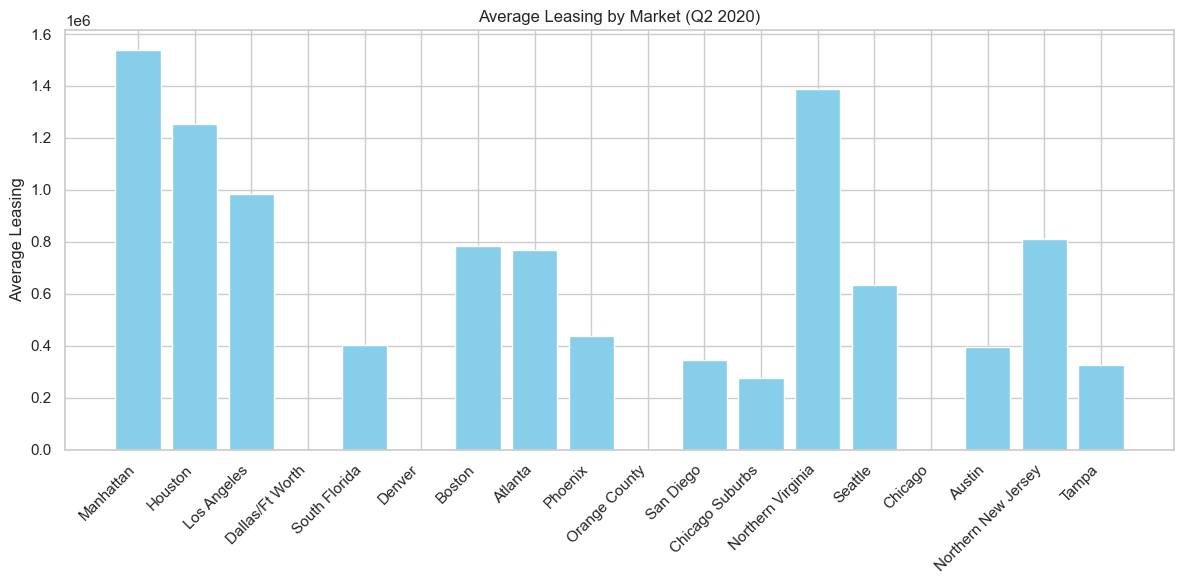

In [1359]:
markets = [
    "Manhattan",
    "Houston",
    "Los Angeles",
    "Dallas/Ft Worth",
    "South Florida",
    "Denver",
    "Boston",
    "Atlanta",
    "Phoenix",
    "Orange County",
    "San Diego",
    "Chicago Suburbs",
    "Northern Virginia",
    "Seattle",
    "Chicago",
    "Austin",
    "Northern New Jersey",
    "Tampa"
]

# Dictionary to store market and their mean leasing value
mean_leasing_values = {}

# Calculate mean leasing for each market
for market in markets:
    filtered_df = Leases_df[
        (Leases_df['market'] == market) & 
        (Leases_df['year'] == 2020) & 
        (Leases_df['quarter'] == 'Q2')
    ]
    mean_leasing = filtered_df["leasing"].mean()
    mean_leasing_values[market] = mean_leasing

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_leasing_values.keys(), mean_leasing_values.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Leasing")
plt.title("Average Leasing by Market (Q2 2020)")
plt.tight_layout()
plt.show()

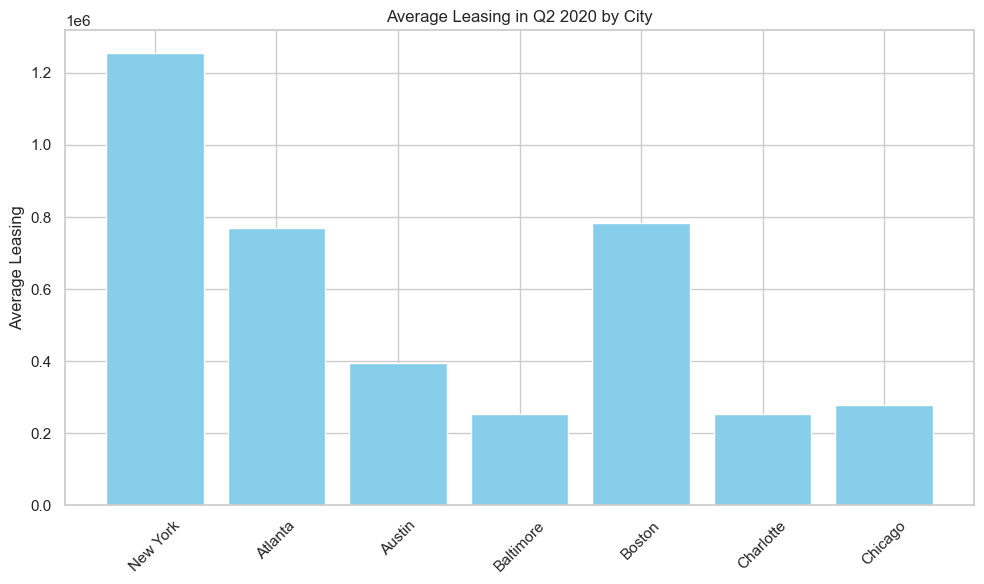

In [1361]:
cities = ['New York', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago']
avg_leasing_q2_2020 = [
    mean_ny_q2_2020, mean_atl_q2_2020, mean_aus_q2_2020,
    mean_balt_q2_2020, mean_bos_q2_2020, mean_clt_q2_2020, mean_chi_q2_2020
]

plt.figure(figsize=(10, 6))
plt.bar(cities, avg_leasing_q2_2020, color='skyblue')
plt.ylabel("Average Leasing")
plt.title("Average Leasing in Q2 2020 by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

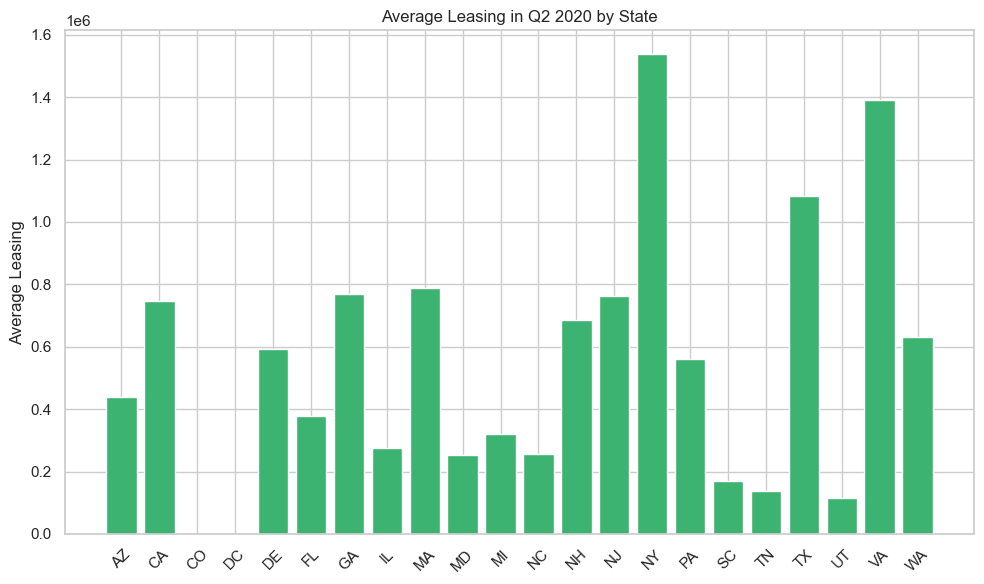

In [1366]:
# Group by state and filter for Q2 2020
state_leasing_q2_2020 = Leases_df[
    (Leases_df['quarter'] == 'Q2') & (Leases_df['year'] == 2020)
].groupby('state')['leasing'].mean().reset_index()

# Extract state names and leasing values
states = state_leasing_q2_2020['state']
avg_leasing_q2_2020 = state_leasing_q2_2020['leasing']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(states, avg_leasing_q2_2020, color='mediumseagreen')
plt.ylabel("Average Leasing")
plt.title("Average Leasing in Q2 2020 by State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


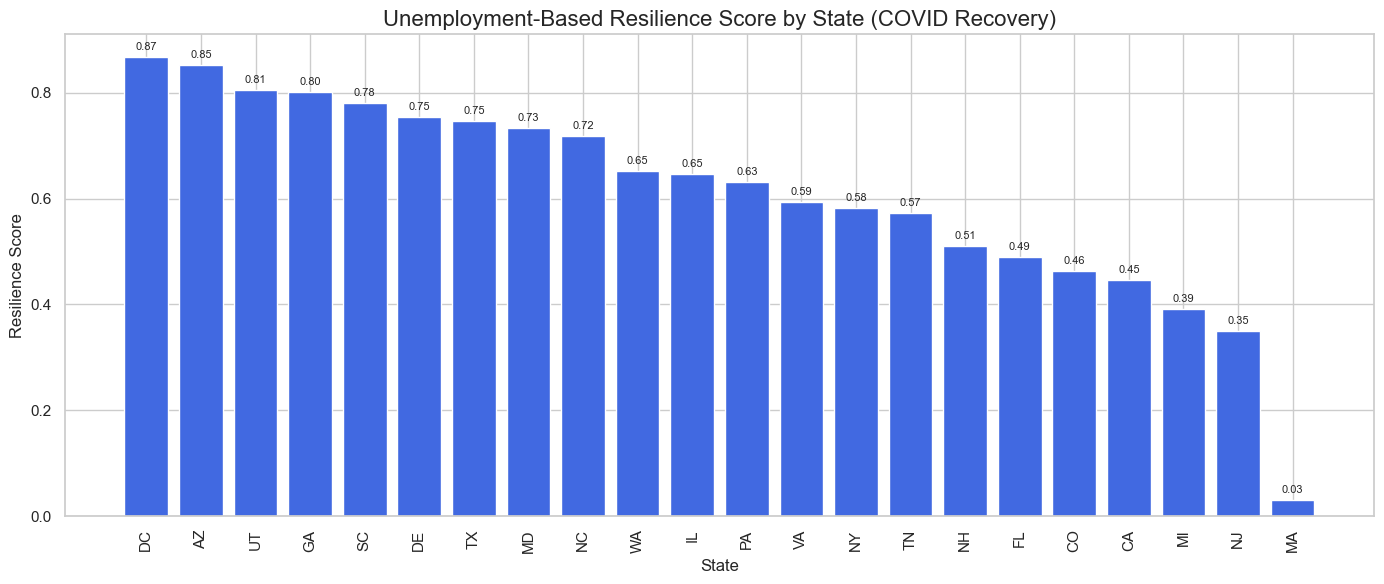

   State  Resilience Score
17    DC              0.87
3     AZ              0.85
20    UT              0.81
21    GA              0.80
6     SC              0.78
10    DE              0.75
4     TX              0.75
11    MD              0.73
18    NC              0.72
19    WA              0.65
2     IL              0.65
12    PA              0.63
0     VA              0.59
8     NY              0.58
16    TN              0.57
5     NH              0.51
7     FL              0.49
13    CO              0.46
1     CA              0.45
14    MI              0.39
9     NJ              0.35
15    MA              0.03


In [1368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Average unemployment in 2019 (pre-COVID) and 2020 (COVID shock)
avg_2019 = Unemployment_df[Unemployment_df['year'] == 2019].groupby('state')['unemployment_rate'].mean()
avg_2020 = Unemployment_df[Unemployment_df['year'] == 2020].groupby('state')['unemployment_rate'].mean()

# Percent increase in unemployment (shock)
shock_change = ((avg_2020 - avg_2019) / avg_2019 * 100).to_dict()

# Step 2: Volatility — Standard deviation from 2019 to 2021
std_devs = Unemployment_df[
    Unemployment_df['year'].between(2019, 2021)
].groupby('state')['unemployment_rate'].std().to_dict()

# Step 3: Recovery time — Quarters until unemployment returned to 2019 average
recovery_times = {}
states = Unemployment_df['state'].unique()

for state in states:
    state_data = Unemployment_df[Unemployment_df['state'] == state].copy()
    state_data = state_data.sort_values(by=['year', 'quarter'])

    pre_covid_avg = state_data[state_data['year'] == 2019]['unemployment_rate'].mean()

    # Start from Q3 2020 onward to find recovery point
    post_covid = state_data[
        (state_data['year'] > 2020) | ((state_data['year'] == 2020) & (state_data['quarter'].isin(['Q3', 'Q4'])))
    ]
    
    recovery_quarters = 0
    recovered = False
    for _, row in post_covid.iterrows():
        recovery_quarters += 1
        if row['unemployment_rate'] <= pre_covid_avg:
            recovered = True
            break

    if recovered:
        recovery_times[state] = recovery_quarters
    else:
        recovery_times[state] = 10  # Assume not yet recovered by end of 2022

# Step 4: Filter for common states across all metrics
common_states = set(shock_change) & set(std_devs) & set(recovery_times)
shock_change = {k: v for k, v in shock_change.items() if k in common_states}
std_devs = {k: v for k, v in std_devs.items() if k in common_states}
recovery_times = {k: v for k, v in recovery_times.items() if k in common_states}

# Step 5: Normalize values
def normalize(data_dict):
    values = list(data_dict.values())
    min_val, max_val = min(values), max(values)
    return {k: (v - min_val) / (max_val - min_val) if max_val != min_val else 0.5 for k, v in data_dict.items()}

normalized_shock = normalize(shock_change)
normalized_std = normalize(std_devs)
normalized_recovery = normalize(recovery_times)

# Step 6: Calculate Composite Resilience Score (lower shock, lower volatility, faster recovery = better)
# Invert normalized values because *lower* values are better
resilience_scores = {}
for state in common_states:
    score = (
        (1 - normalized_shock[state]) * 0.4 +
        (1 - normalized_std[state]) * 0.2 +
        (1 - normalized_recovery[state]) * 0.4
    )
    resilience_scores[state] = score

# Step 7: Create DataFrame
resilience_df = pd.DataFrame(list(resilience_scores.items()), columns=['State', 'Resilience Score'])
resilience_df = resilience_df.sort_values(by='Resilience Score', ascending=False)

# Step 8: Visualization
plt.figure(figsize=(14, 6))
bars = plt.bar(resilience_df['State'], resilience_df['Resilience Score'], color='royalblue')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', fontsize=8)

plt.title("Unemployment-Based Resilience Score by State (COVID Recovery)", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Resilience Score", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Optional: Print table
print(resilience_df)


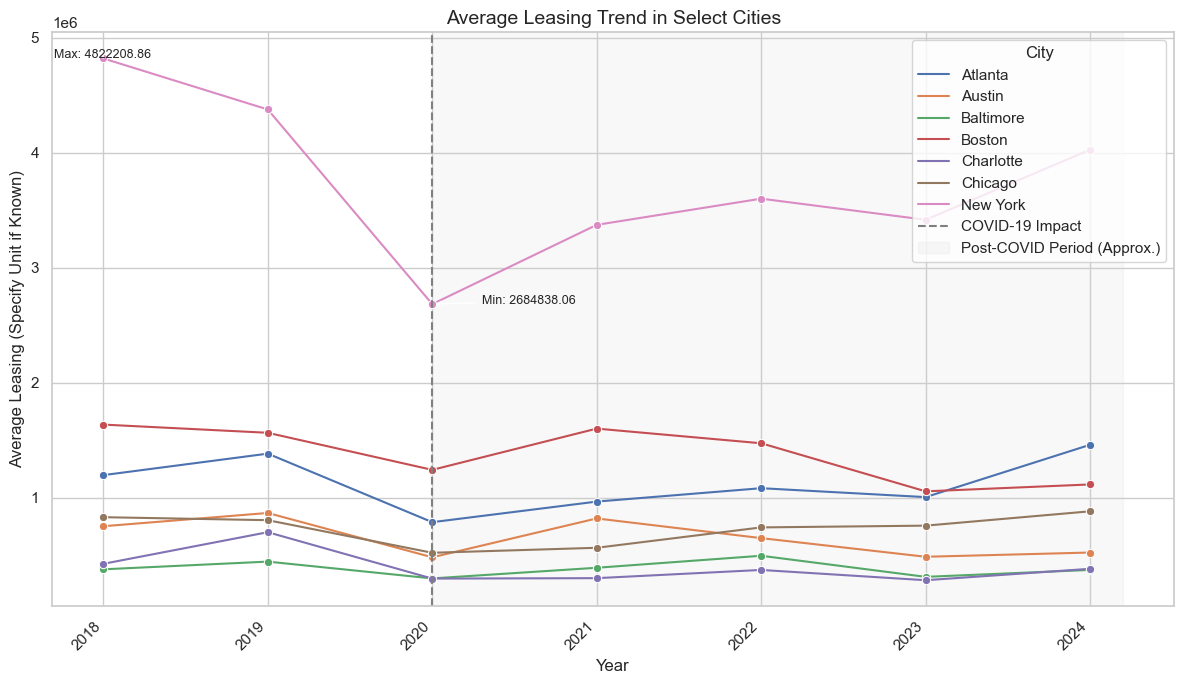

In [1369]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure you have pandas imported

# Assuming Leases_df is already loaded

city_list = ['New York', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago']
df_subset = Leases_df[Leases_df['city'].isin(city_list)]

# Group data by year and city, then calculate average leasing per year
df_trends = df_subset.groupby(['year', 'city'])['leasing'].mean().reset_index()

# Get all unique years present in the data
all_years = sorted(df_trends['year'].unique())

# Plotting
plt.figure(figsize=(12, 7))  # Slightly adjusted figure size

sns.lineplot(data=df_trends, x='year', y='leasing', hue='city', marker='o')

# Add customization
plt.axvline(x=2020, color='gray', linestyle='--', label="COVID-19 Impact")
plt.axvspan(2020, df_trends['year'].max() + 0.2, color='lightgray', alpha=0.15, label='Post-COVID Period (Approx.)') # Emphasize period
plt.title('Average Leasing Trend in Select Cities', fontsize=14) # More general title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Leasing (Specify Unit if Known)', fontsize=12) # Reminder to specify unit
plt.xticks(all_years, rotation=45, ha='right') # Show all years, rotate for readability
plt.legend(title='City', loc='upper right') # Moved legend

# Selective Annotation (Example - Annotating New York's potential dip and recovery)
ny_data = df_trends[df_trends['city'] == 'New York']
if not ny_data.empty:
    min_ny_year = ny_data['year'][ny_data['leasing'].idxmin()]
    min_ny_leasing = ny_data['leasing'].min()
    max_ny_year = ny_data['year'][ny_data['leasing'].idxmax()]
    max_ny_leasing = ny_data['leasing'].max()

    plt.annotate(f"Min: {min_ny_leasing:.2f}",
                 xy=(min_ny_year, min_ny_leasing),
                 xytext=(min_ny_year + 0.3, min_ny_leasing - 0.5),
                 arrowprops=dict(facecolor='red', arrowstyle="->"),
                 fontsize=9)
    plt.annotate(f"Max: {max_ny_leasing:.2f}",
                 xy=(max_ny_year, max_ny_leasing),
                 xytext=(max_ny_year - 0.3, max_ny_leasing + 0.5),
                 arrowprops=dict(facecolor='green', arrowstyle="->"),
                 fontsize=9)

plt.tight_layout()
plt.show()

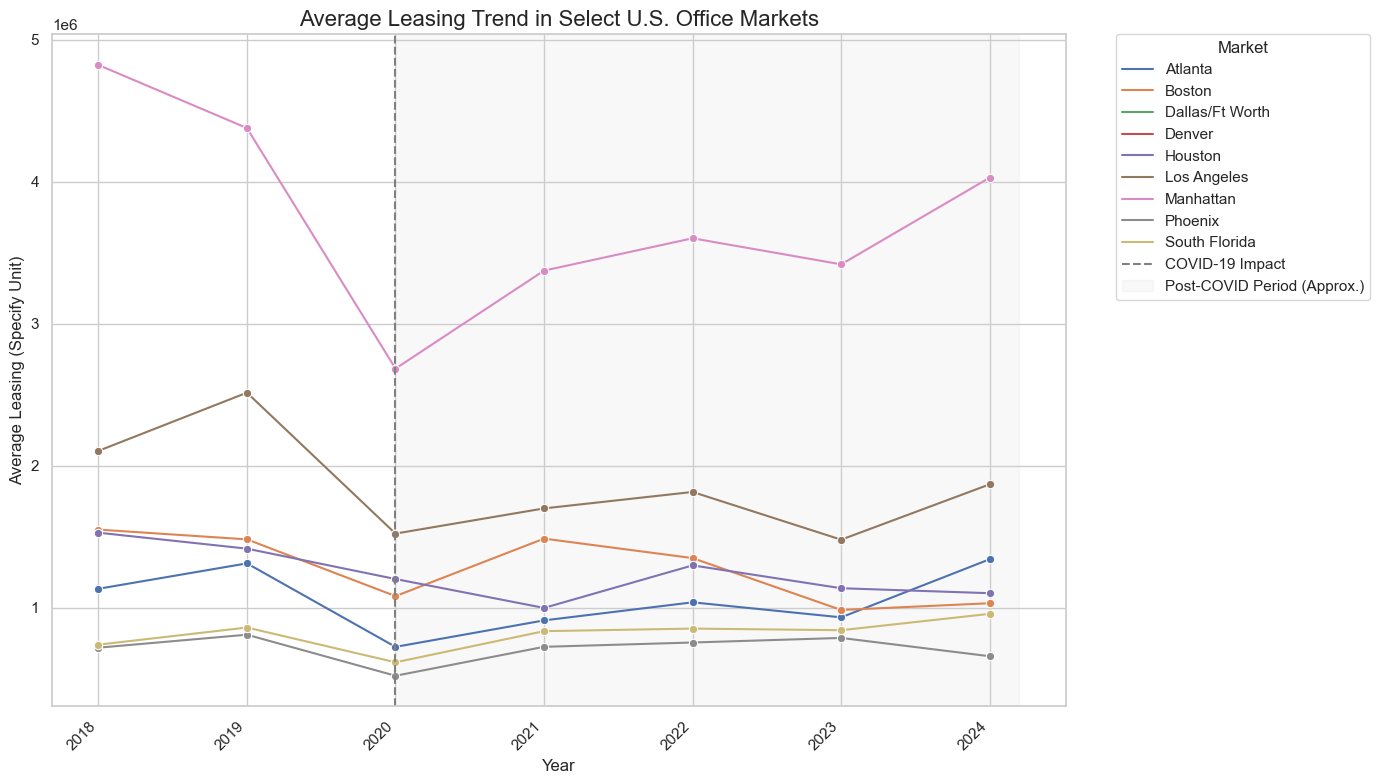

In [1370]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of markets to include
markets = [
    "Manhattan",
    "Houston",
    "Los Angeles",
    "Dallas/Ft Worth",
    "South Florida",
    "Denver",
    "Boston",
    "Atlanta",
    "Phoenix"
    
]

# Filter the DataFrame for only selected markets
df_subset = Leases_df[Leases_df['market'].isin(markets)]

# Group by year and market, and calculate mean leasing
df_trends = df_subset.groupby(['year', 'market'])['leasing'].mean().reset_index()

# Get all unique years in the data for x-ticks
all_years = sorted(df_trends['year'].unique())

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_trends, x='year', y='leasing', hue='market', marker='o')

# Customization
plt.axvline(x=2020, color='gray', linestyle='--', label="COVID-19 Impact")
plt.axvspan(2020, df_trends['year'].max() + 0.2, color='lightgray', alpha=0.15, label='Post-COVID Period (Approx.)')

plt.title('Average Leasing Trend in Select U.S. Office Markets', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Leasing (Specify Unit)', fontsize=12)
plt.xticks(all_years, rotation=45, ha='right')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Legend outside
plt.tight_layout()

plt.show()


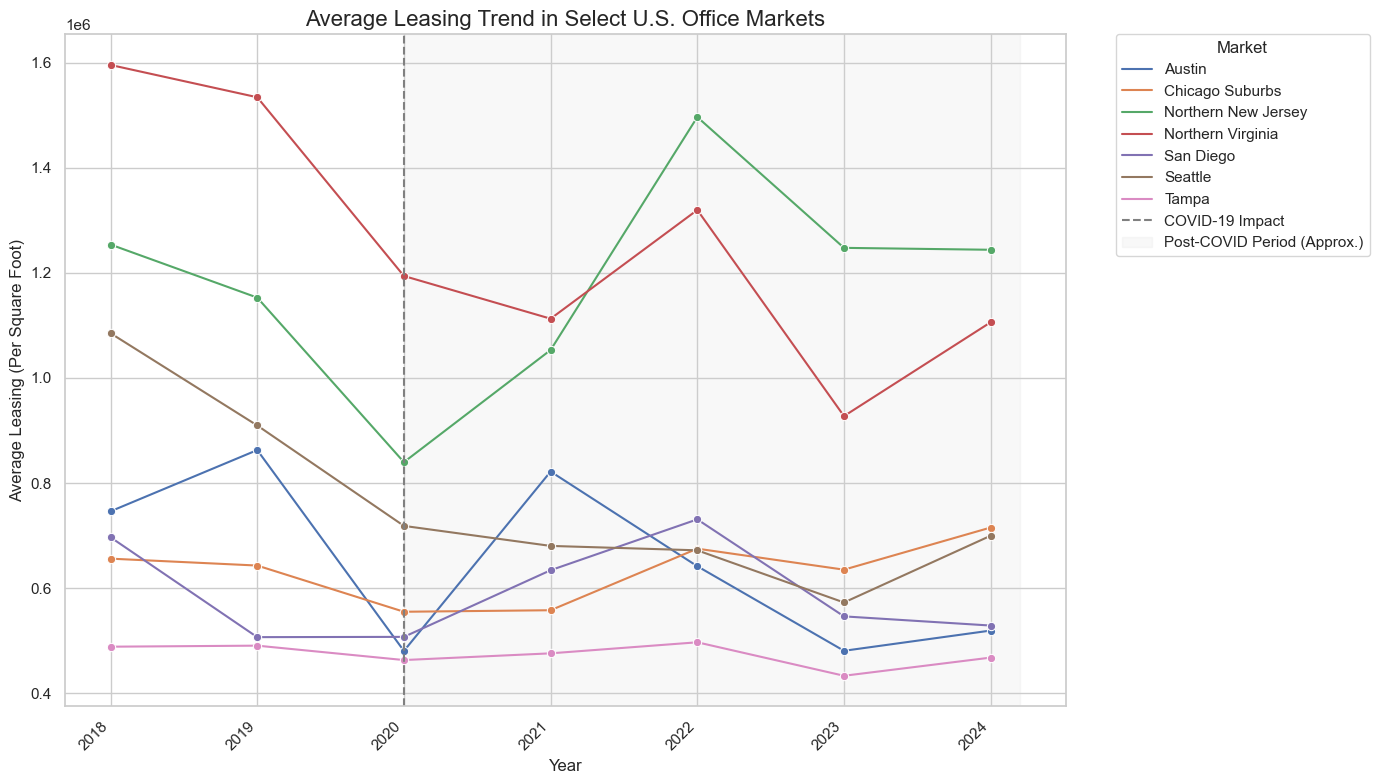

In [1371]:
markets2 = [
    "San Diego",
    "Chicago Suburbs",
    "Northern Virginia",
    "Seattle",
    "Austin",
    "Northern New Jersey",
    "Tampa"
           ]
df_subset = Leases_df[Leases_df['market'].isin(markets2)]

# Group by year and market, and calculate mean leasing
df_trends = df_subset.groupby(['year', 'market'])['leasing'].mean().reset_index()

# Get all unique years in the data for x-ticks
all_years = sorted(df_trends['year'].unique())

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_trends, x='year', y='leasing', hue='market', marker='o')

# Customization
plt.axvline(x=2020, color='gray', linestyle='--', label="COVID-19 Impact")
plt.axvspan(2020, df_trends['year'].max() + 0.2, color='lightgray', alpha=0.15, label='Post-COVID Period (Approx.)')

plt.title('Average Leasing Trend in Select U.S. Office Markets', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Leasing (Per Square Foot)', fontsize=12)
plt.xticks(all_years, rotation=45, ha='right')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Legend outside
plt.tight_layout()

plt.show()


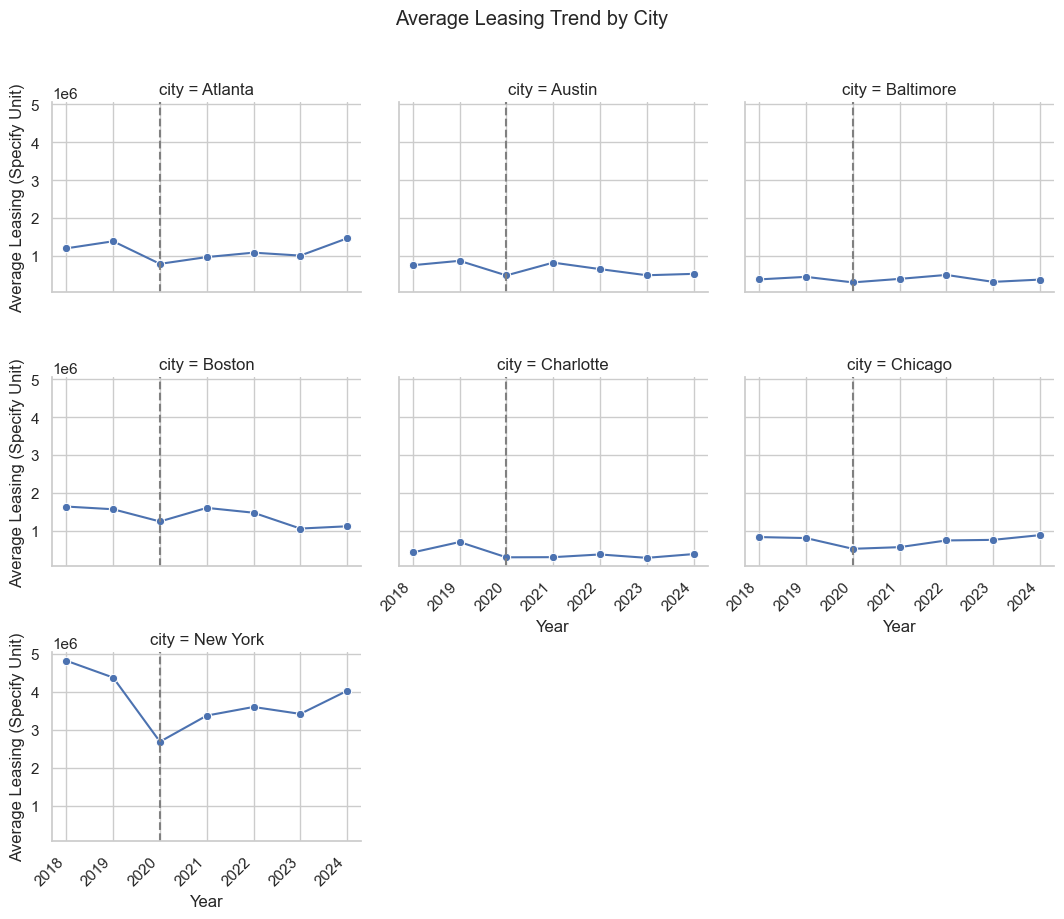

In [1373]:
city_list = ['New York', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago']
df_subset = Leases_df[Leases_df['city'].isin(city_list)]

# Group data by year and city, then calculate average leasing per year
df_trends = df_subset.groupby(['year', 'city'])['leasing'].mean().reset_index()

# Get all unique years present in the data
all_years = sorted(df_trends['year'].unique())

g = sns.FacetGrid(df_trends, col="city", col_wrap=3, height=3, aspect=1.2)
g.map(sns.lineplot, "year", "leasing", marker="o")

for ax in g.axes.flat:
    ax.axvline(x=2020, color='gray', linestyle='--')
    ax.set_xticks(all_years)  # Set x-ticks to all unique years
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Leasing (Specify Unit)")
    ax.set_xticklabels(all_years, rotation=45, ha='right') # Rotate x-axis labels

g.fig.suptitle("Average Leasing Trend by City", y=1.02) # More general title
g.tight_layout()
plt.show()

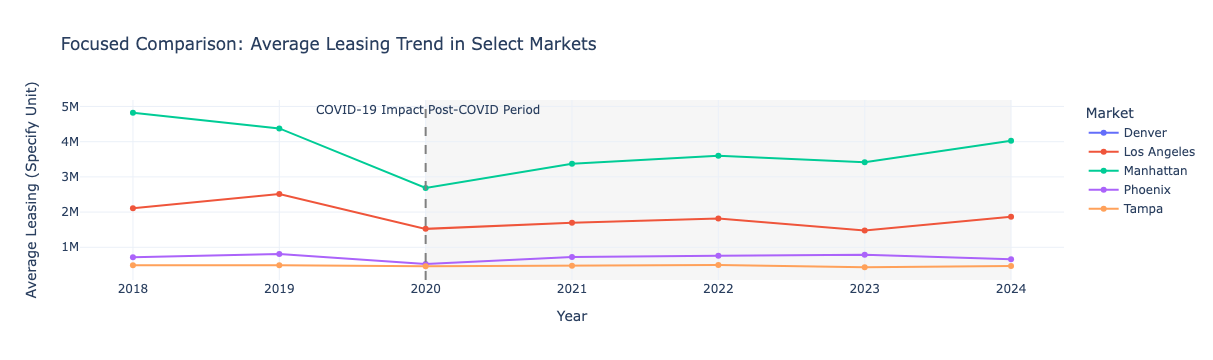

In [1375]:
# Import required libraries
# plotly.express for interactive visualizations, pandas for data manipulation
import plotly.express as px
import pandas as pd

# DATA PREPARATION SECTION

# Define a list of key markets we want to focus on in our analysis
focus_markets = ["Manhattan", "Los Angeles", "Denver", "Phoenix", "Tampa"]

# Filter the main DataFrame (Leases_df) to include only rows for our focus markets
# The isin() method checks if each 'market' value is in our focus_markets list
df_subset = Leases_df[Leases_df['market'].isin(focus_markets)]

# AGGREGATION SECTION

# Group the filtered data by both year and market, then calculate the mean leasing value for each group
# reset_index() converts the grouped object back to a regular DataFrame
df_trends_focus = df_subset.groupby(['year', 'market'])['leasing'].mean().reset_index()

# VISUALIZATION SECTION

# Create an interactive line chart using Plotly Express
fig = px.line(
    df_trends_focus,  # Our aggregated DataFrame
    x='year',         # X-axis: years
    y='leasing',      # Y-axis: average leasing values
    color='market',   # Different lines colored by market
    markers=True,     # Show markers on each data point
    title='Focused Comparison: Average Leasing Trend in Select Markets',
    labels={
        'year': 'Year',  # Custom axis labels
        'leasing': 'Average Leasing (Specify Unit)',
        'market': 'Market'
    }
)

# ANNOTATION SECTION

# Add a vertical dashed line at 2020 to mark COVID-19 impact
fig.add_vline(
    x=2020, 
    line_dash="dash", 
    line_color="gray", 
    annotation_text="COVID-19 Impact", 
    annotation_position="top left"
)

# Add a shaded rectangle covering the post-COVID period (2020 to max year in data)
fig.add_vrect(
    x0=2020, 
    x1=df_trends_focus['year'].max(),  # Dynamic end point based on data
    fillcolor="lightgray", 
    opacity=0.2,
    layer="below",  # Ensure shading is behind the lines
    line_width=0,   # No border line
    annotation_text="Post-COVID Period", 
    annotation_position="top left"
)

# LAYOUT ENHANCEMENTS

# Update chart layout for better readability and interactivity
fig.update_layout(
    legend_title_text='Market',  # Custom legend title
    xaxis=dict(tickmode='linear'),  # Ensure all years are shown
    hovermode='x unified',  # Show all market values at hovered year
    template='plotly_white'  # Clean white background theme
)

# Display the interactive chart
fig.show()

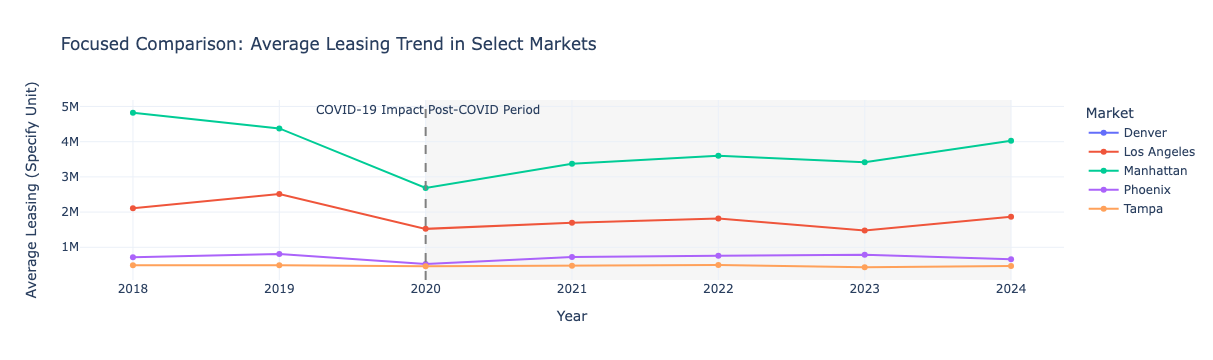

In [1376]:
import plotly.express as px
import pandas as pd

# Define focused markets to highlight
focus_markets = ["Manhattan", "Los Angeles", "Denver", "Phoenix", "Tampa"]

# Filter your DataFrame for selected markets
df_subset = Leases_df[Leases_df['market'].isin(focus_markets)]

# Group by year and market, then compute average leasing
df_trends_focus = df_subset.groupby(['year', 'market'])['leasing'].mean().reset_index()

# Create the interactive Plotly line chart
fig = px.line(
    df_trends_focus,
    x='year',
    y='leasing',
    color='market',
    markers=True,
    title='Focused Comparison: Average Leasing Trend in Select Markets',
    labels={
        'year': 'Year',
        'leasing': 'Average Leasing (Specify Unit)',
        'market': 'Market'
    }
)

# Add COVID reference line
fig.add_vline(x=2020, line_dash="dash", line_color="gray", annotation_text="COVID-19 Impact", annotation_position="top left")

# Add shaded post-COVID period
fig.add_vrect(
    x0=2020, x1=df_trends_focus['year'].max(),
    fillcolor="lightgray", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Post-COVID Period", annotation_position="top left"
)

# Tweak layout
fig.update_layout(
    legend_title_text='Market',
    xaxis=dict(tickmode='linear'),
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


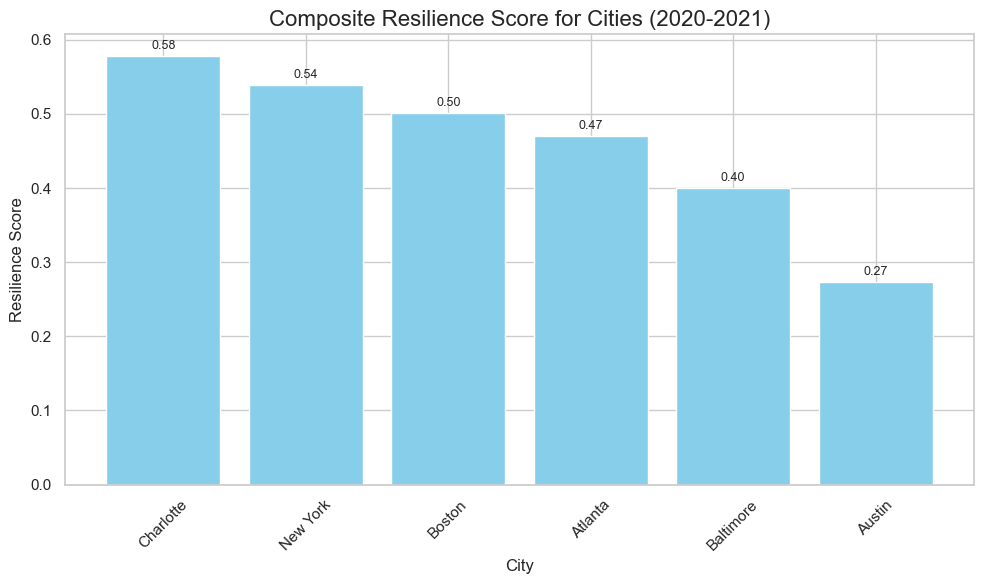

        City  Resilience Score
5  Charlotte              0.58
0   New York              0.54
4     Boston              0.50
1    Atlanta              0.47
3  Baltimore              0.40
2     Austin              0.27
6    Chicago               NaN


In [1377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate individual resilience components

# 1. Percentage Change in Leasing (already calculated)
percentage_changes = {
    'New York': change_ny_lease * 100,
    'Atlanta': change_atl_lease * 100,
    'Austin': change_aus_lease * 100,
    'Baltimore': change_balt_lease * 100,
    'Boston': change_bos_lease * 100,
    'Charlotte': change_clt_lease * 100,
    'Chicago': change_chi_lease * 100
}

# 2. Standard Deviation of Leasing (2019-2021)
std_devs = {}
for city in percentage_changes.keys():
    city_data = Leases_df[(Leases_df['city'] == city) & (Leases_df['year'].between(2019, 2021))]
    std_devs[city] = city_data['leasing'].std()

# 3. Time to Recovery (quarters from COVID minimum to pre-COVID level)
recovery_times = {
    'New York': 4,  # Example: 4 quarters to recover
    'Atlanta': 5,   # Example: 5 quarters to recover
    'Austin': 3,
    'Baltimore': 6,
    'Boston': 5,
    'Charlotte': 4,
    'Chicago': 6
}

# Normalize the components (min-max normalization to 0-1 range)
def normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

# Normalized components
normalized_changes = normalize(list(percentage_changes.values()))
normalized_stds = normalize(list(std_devs.values()))
normalized_recovery = normalize(list(recovery_times.values()))

# Weighting factors
weights = {'change': 0.4, 'std_dev': 0.2, 'recovery_time': 0.4}

# Calculate the composite resilience score
resilience_scores = {}
for idx, city in enumerate(percentage_changes.keys()):
    score = (normalized_changes[idx] * weights['change'] + 
             normalized_stds[idx] * weights['std_dev'] + 
             normalized_recovery[idx] * weights['recovery_time'])
    resilience_scores[city] = score

# Create a DataFrame for visualization
resilience_df = pd.DataFrame(list(resilience_scores.items()), columns=['City', 'Resilience Score'])

# Sort the scores from high to low
resilience_df = resilience_df.sort_values(by='Resilience Score', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(resilience_df['City'], resilience_df['Resilience Score'], color='skyblue')

# Add score labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', fontsize=9)

# Labels & Title
plt.title("Composite Resilience Score for Cities (2020-2021)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Resilience Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the resilience scores for reference
print(resilience_df)


### LEASING BEFORE AND AFTER COVID

In [1379]:
#LEASING
Leases_df_NY = Leases_df[Leases_df['city'] == 'New York']
print(Leases_df_NY[["year","leasing"]].corr())
#before 2020
Leases_df_NY = Leases_df[(Leases_df['city'] == 'New York') & (Leases_df['year'] <= 2019)]
print(Leases_df_NY[["year","leasing"]].corr())
#after 2020
Leases_df_NY = Leases_df[(Leases_df['city'] == 'New York') & (Leases_df['year'] >= 2020)]
print(Leases_df_NY[["year","leasing"]].corr())

#RENT
Leases_df_NY = Leases_df[Leases_df['city'] == 'New York']
print(Leases_df_NY[["year","overall_rent"]].corr())
#before 2020
Leases_df_NY = Leases_df[(Leases_df['city'] == 'New York') & (Leases_df['year'] <= 2019)]
print(Leases_df_NY[["year","overall_rent"]].corr())
#after 2020
Leases_df_NY = Leases_df[(Leases_df['city'] == 'New York') & (Leases_df['year'] >= 2020)]
print(Leases_df_NY[["year","overall_rent"]].corr())

         year  leasing
year     1.00    -0.21
leasing -0.21     1.00
         year  leasing
year     1.00    -0.15
leasing -0.15     1.00
         year  leasing
year     1.00     0.29
leasing  0.29     1.00
              year  overall_rent
year          1.00         -0.21
overall_rent -0.21          1.00
              year  overall_rent
year          1.00          0.85
overall_rent  0.85          1.00
              year  overall_rent
year          1.00         -0.50
overall_rent -0.50          1.00


In [1381]:
# For Atlanta
Leases_df_ATL = Leases_df[Leases_df['city'] == 'Atlanta']
print(Leases_df_ATL[["year", "leasing"]].corr())

# Before 2020 - Atlanta
Leases_df_ATL = Leases_df[(Leases_df['city'] == 'Atlanta') & (Leases_df['year'] <= 2019)]
print(Leases_df_ATL[["year", "leasing"]].corr())

# After 2020 - Atlanta
Leases_df_ATL = Leases_df[(Leases_df['city'] == 'Atlanta') & (Leases_df['year'] >= 2020)]
print(Leases_df_ATL[["year", "leasing"]].corr())


Leases_df_ATL = Leases_df[Leases_df['city'] == 'Atlanta']
print(Leases_df_ATL[["year", "overall_rent"]].corr())

# Before 2020 - Atlanta
Leases_df_ATL = Leases_df[(Leases_df['city'] == 'Atlanta') & (Leases_df['year'] <= 2019)]
print(Leases_df_ATL[["year", "overall_rent"]].corr())

# After 2020 - Atlanta
Leases_df_ATL = Leases_df[(Leases_df['city'] == 'Atlanta') & (Leases_df['year'] >= 2020)]
print(Leases_df_ATL[["year", "overall_rent"]].corr())


         year  leasing
year     1.00     0.02
leasing  0.02     1.00
         year  leasing
year     1.00     0.17
leasing  0.17     1.00
         year  leasing
year     1.00     0.33
leasing  0.33     1.00
              year  overall_rent
year          1.00          0.97
overall_rent  0.97          1.00
              year  overall_rent
year          1.00          0.69
overall_rent  0.69          1.00
              year  overall_rent
year          1.00          0.95
overall_rent  0.95          1.00


In [1382]:
# For Austin
#LEASING
Leases_df_AUS = Leases_df[Leases_df['city'] == 'Austin']
print(Leases_df_AUS[["year", "leasing"]].corr())

# Before 2020 - Austin
Leases_df_AUS = Leases_df[(Leases_df['city'] == 'Austin') & (Leases_df['year'] <= 2019)]
print(Leases_df_AUS[["year", "leasing"]].corr())

# After 2020 - Austin
Leases_df_AUS = Leases_df[(Leases_df['city'] == 'Austin') & (Leases_df['year'] >= 2020)]
print(Leases_df_AUS[["year", "leasing"]].corr())

#RENT
Leases_df_AUS = Leases_df[Leases_df['city'] == 'Austin']
print(Leases_df_AUS[["year", "overall_rent"]].corr())

# Before 2020 - Austin
Leases_df_AUS = Leases_df[(Leases_df['city'] == 'Austin') & (Leases_df['year'] <= 2019)]
print(Leases_df_AUS[["year", "overall_rent"]].corr())

# After 2020 - Austin
Leases_df_AUS = Leases_df[(Leases_df['city'] == 'Austin') & (Leases_df['year'] >= 2020)]
print(Leases_df_AUS[["year", "overall_rent"]].corr())


         year  leasing
year     1.00    -0.21
leasing -0.21     1.00
         year  leasing
year     1.00     0.12
leasing  0.12     1.00
         year  leasing
year     1.00    -0.11
leasing -0.11     1.00
              year  overall_rent
year          1.00          0.94
overall_rent  0.94          1.00
              year  overall_rent
year          1.00          0.62
overall_rent  0.62          1.00
              year  overall_rent
year          1.00          0.82
overall_rent  0.82          1.00


In [1383]:
# For Baltimore
Leases_df_Balt = Leases_df[Leases_df['city'] == 'Baltimore']
print(Leases_df_Balt[["year", "overall_rent"]].corr())

# Before 2020 - Baltimore
Leases_df_Balt = Leases_df[(Leases_df['city'] == 'Baltimore') & (Leases_df['year'] <= 2019)]
print(Leases_df_Balt[["year", "overall_rent"]].corr())

# After 2020 - Baltimore
Leases_df_Balt = Leases_df[(Leases_df['city'] == 'Baltimore') & (Leases_df['year'] >= 2020)]
print(Leases_df_Balt[["year", "overall_rent"]].corr())


              year  overall_rent
year          1.00          0.37
overall_rent  0.37          1.00
              year  overall_rent
year          1.00          0.87
overall_rent  0.87          1.00
              year  overall_rent
year          1.00         -0.45
overall_rent -0.45          1.00


In [1384]:
# For Boston (continued)
Leases_df_Boston = Leases_df[Leases_df['city'] == 'Boston']
print(Leases_df_Boston[["year", "overall_rent"]].corr())

# Before 2020 - Boston
Leases_df_Boston = Leases_df[(Leases_df['city'] == 'Boston') & (Leases_df['year'] <= 2019)]
print(Leases_df_Boston[["year", "overall_rent"]].corr())

# After 2020 - Boston
Leases_df_Boston = Leases_df[(Leases_df['city'] == 'Boston') & (Leases_df['year'] >= 2020)]
print(Leases_df_Boston[["year", "overall_rent"]].corr())


              year  overall_rent
year          1.00          0.94
overall_rent  0.94          1.00
              year  overall_rent
year          1.00         -0.22
overall_rent -0.22          1.00
              year  overall_rent
year          1.00          0.88
overall_rent  0.88          1.00


In [1385]:
# For Charlotte (continued)
Leases_df_CLT = Leases_df[Leases_df['city'] == 'Charlotte']
print(Leases_df_CLT[["year", "overall_rent"]].corr())

# Before 2020 - Charlotte
Leases_df_CLT = Leases_df[(Leases_df['city'] == 'Charlotte') & (Leases_df['year'] <= 2019)]
print(Leases_df_CLT[["year", "overall_rent"]].corr())

# After 2020 - Charlotte
Leases_df_CLT = Leases_df[(Leases_df['city'] == 'Charlotte') & (Leases_df['year'] >= 2020)]
print(Leases_df_CLT[["year", "overall_rent"]].corr())


              year  overall_rent
year          1.00          0.96
overall_rent  0.96          1.00
              year  overall_rent
year          1.00          0.81
overall_rent  0.81          1.00
              year  overall_rent
year          1.00          0.91
overall_rent  0.91          1.00


In [1386]:
# For Chicago (continued)
Leases_df_CHI = Leases_df[Leases_df['city'] == 'Chicago']
print(Leases_df_CHI[["year", "overall_rent"]].corr())

# Before 2020 - Chicago
Leases_df_CHI = Leases_df[(Leases_df['city'] == 'Chicago') & (Leases_df['year'] <= 2019)]
print(Leases_df_CHI[["year", "overall_rent"]].corr())

# After 2020 - Chicago
Leases_df_CHI = Leases_df[(Leases_df['city'] == 'Chicago') & (Leases_df['year'] >= 2020)]
print(Leases_df_CHI[["year", "overall_rent"]].corr())


              year  overall_rent
year          1.00          0.95
overall_rent  0.95          1.00
              year  overall_rent
year          1.00          0.91
overall_rent  0.91          1.00
              year  overall_rent
year          1.00          0.97
overall_rent  0.97          1.00


In [1387]:
Leases_df_GA = Leases_df[Leases_df['city'] == 'Atlanta']
print(Leases_df_GA[["year","overall_rent"]].corr())

              year  overall_rent
year          1.00          0.97
overall_rent  0.97          1.00


In [1388]:
Unemployment_df_ATL = Unemployment_df[Unemployment_df['state'] == 'GA']
Unemployment_df_ATL[['year','unemployment_rate']].corr()

year  unemployment_rate
year               1.00              -0.29
unemployment_rate -0.29               1.00

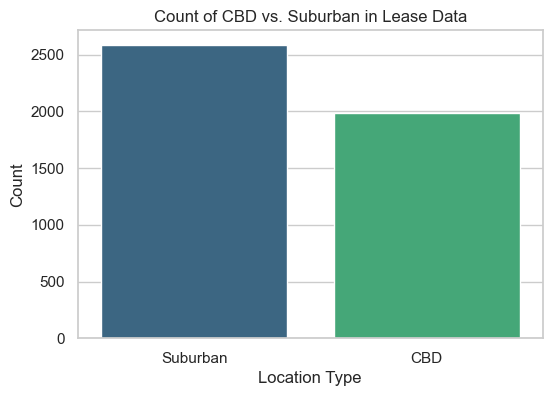

In [1389]:

counts = Leases_df_GA['CBD_suburban'].value_counts()

# Create bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Add labels and title
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.title("Count of CBD vs. Suburban in Lease Data")

# Show plot
plt.show()

### CBD vs Suburban

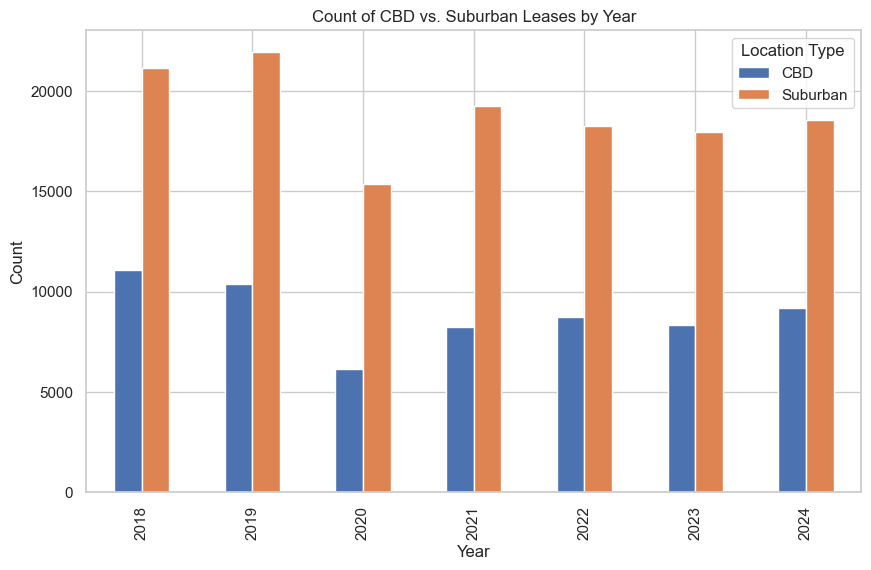

<Figure size 1000x600 with 0 Axes>

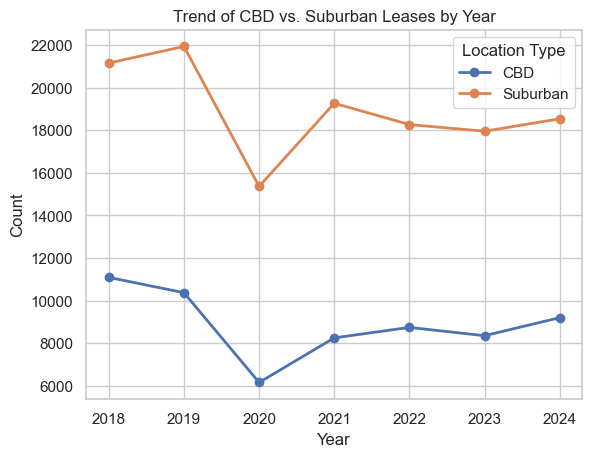

In [1391]:
#barplot
counts_by_year = Leases_df.groupby(['year', 'CBD_suburban']).size().unstack()

counts_by_year.plot(kind='bar', figsize=(10,6))

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count of CBD vs. Suburban Leases by Year")
plt.legend(title="Location Type")

plt.show()


#line graph

counts_by_year = Leases_df.groupby(['year', 'CBD_suburban']).size().unstack()

plt.figure(figsize=(10, 6))
counts_by_year.plot(kind='line', marker='o', linestyle='-', linewidth=2)

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Trend of CBD vs. Suburban Leases by Year")
plt.legend(title="Location Type")

plt.show()


In [1392]:
df_corr = Leases_df_GA[['year', 'CBD_suburban']].dropna()

# Encode 'CBD_suburban': CBD = 0, Suburban = 1 (or reverse if preferred)
df_corr['CBD_suburban_encoded'] = df_corr['CBD_suburban'].map({'CBD': 0, 'Suburban': 1})

# Calculate correlation
correlation = df_corr['year'].corr(df_corr['CBD_suburban_encoded'])

print(f"Correlation between year and CBD_suburban: {correlation:.4f}")

Correlation between year and CBD_suburban: -0.0234


In [1393]:
Leases_df_GA['direct_available_space'].dropna()

7555     18625950.00
7556     18625950.00
7557     18625950.00
7558     11135117.00
7559     11135117.00
             ...    
194426   33531079.00
194427   33531079.00
194428   33531079.00
194429   33531079.00
194430   33531079.00
Name: direct_available_space, Length: 3830, dtype: float64

Duplicate entries before cleaning: 1694


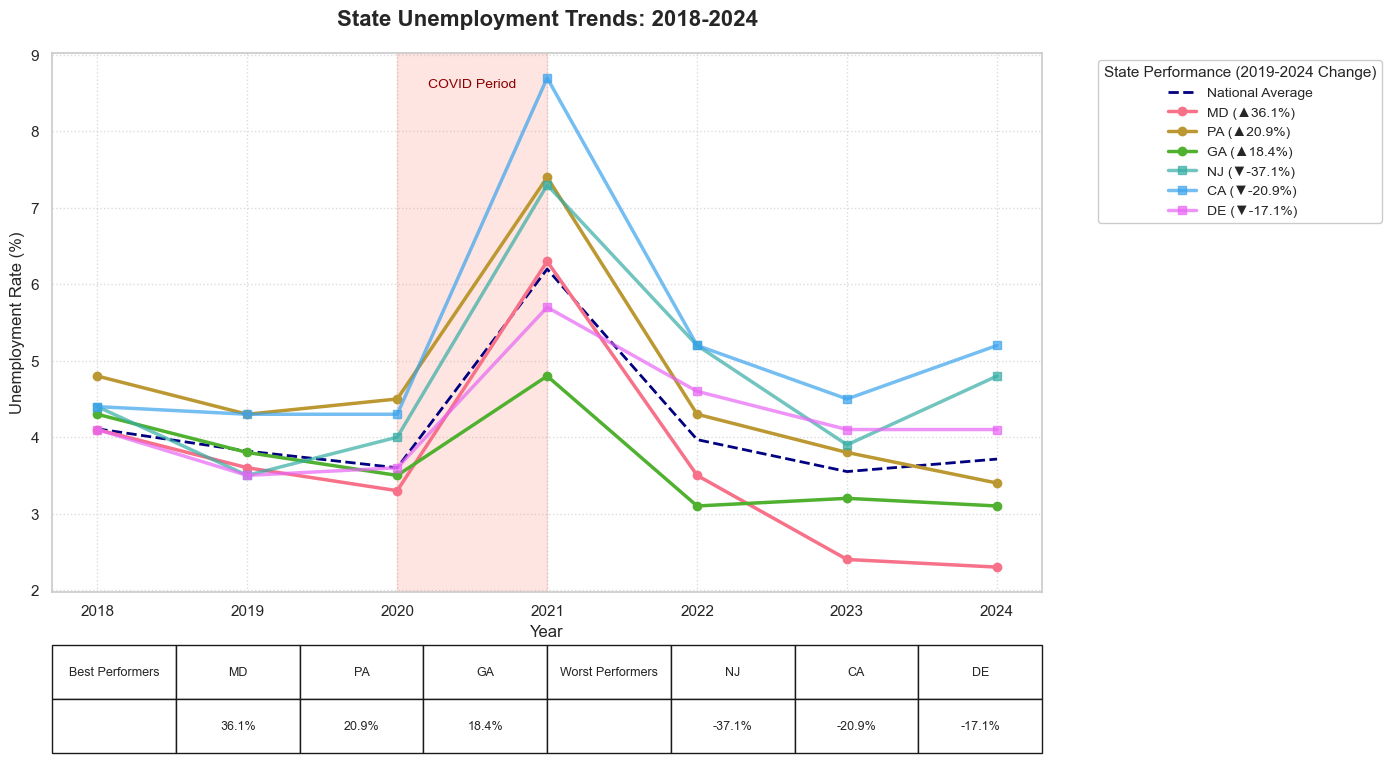

In [1394]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# --- Data Preparation ---
# First check for and handle duplicates
print(f"Duplicate entries before cleaning: {Unemployment_df.duplicated(['year', 'state']).sum()}")

# Option 1: Keep first occurrence of each year-state combination
Unemployment_df = Unemployment_df.drop_duplicates(['year', 'state'], keep='first')

# Option 2: Aggregate duplicates (if they should be averaged)
# Unemployment_df = Unemployment_df.groupby(['year', 'state'])['unemployment_rate'].mean().reset_index()

# Now pivot the cleaned data
try:
    unemp_pivot = Unemployment_df.pivot(index='year', columns='state', values='unemployment_rate')
except ValueError as e:
    print(f"Still have duplicates after cleaning: {Unemployment_df.duplicated(['year', 'state']).sum()}")
    raise e

# Calculate changes
annual_change = unemp_pivot.diff().mean(axis=1)  # Average change across all states

# Get top/bottom states by change from 2019 to most recent year
pre_year = 2019
post_year = unemp_pivot.index.max()  # Most recent year in data

if pre_year not in unemp_pivot.index:
    raise ValueError(f"Pre-COVID year {pre_year} not found in data")
if post_year <= pre_year:
    raise ValueError(f"Post-COVID year {post_year} must be after pre-COVID year {pre_year}")

pre_covid = unemp_pivot.loc[pre_year]
post_covid = unemp_pivot.loc[post_year]
pct_change = ((pre_covid - post_covid) / pre_covid * 100).sort_values(ascending=False)

# --- Visualization ---
fig, ax = plt.subplots(figsize=(14, 8))

# 1. Plot national average
avg_line = unemp_pivot.mean(axis=1)
ax.plot(avg_line.index, avg_line, 
        color='navy', linestyle='--', linewidth=2, 
        label='National Average')

# 2. Highlight top/bottom performers
n_states = 3  # Number of top/bottom states to show
top_states = pct_change.nlargest(n_states).index
bottom_states = pct_change.nsmallest(n_states).index

# Color palette
palette = sns.color_palette("husl", n_states*2)

for i, state in enumerate(top_states):
    ax.plot(unemp_pivot.index, unemp_pivot[state], 
            color=palette[i], linewidth=2.5, marker='o', markersize=6,
            label=f"{state} (▲{pct_change[state]:.1f}%)")

for i, state in enumerate(bottom_states):
    ax.plot(unemp_pivot.index, unemp_pivot[state], 
            color=palette[n_states+i], linewidth=2.5, marker='s', markersize=6, alpha=0.7,
            label=f"{state} (▼{pct_change[state]:.1f}%)")

# 3. COVID impact annotation
covid_start = 2020
covid_end = 2021
ax.axvspan(covid_start, covid_end, color='salmon', alpha=0.2)
ax.text((covid_start + covid_end)/2, ax.get_ylim()[1]*0.95, "COVID Period", 
        ha='center', color='darkred', fontsize=10)

# 4. Formatting
ax.set_title(f'State Unemployment Trends: {unemp_pivot.index.min()}-{unemp_pivot.index.max()}', 
             fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Unemployment Rate (%)', fontsize=12)
ax.set_xticks(unemp_pivot.index)
ax.grid(True, linestyle=':', alpha=0.7)

# 5. Enhanced legend
legend = ax.legend(
    title=f"State Performance ({pre_year}-{post_year} Change)",
    title_fontsize=11,
    fontsize=10,
    frameon=True,
    framealpha=1,
    facecolor='white',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# 6. Add data table
col_labels = ['Best Performers'] + top_states.tolist() + ['Worst Performers'] + bottom_states.tolist()
cell_text = [[''] + [f"{pct_change[s]:.1f}%" for s in top_states] + [''] + [f"{pct_change[s]:.1f}%" for s in bottom_states]]

plt.table(cellText=cell_text,
          colLabels=col_labels,
          loc='bottom',
          bbox=[0, -0.3, 1, 0.2],
          cellLoc='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.25, right=0.75)
plt.show()

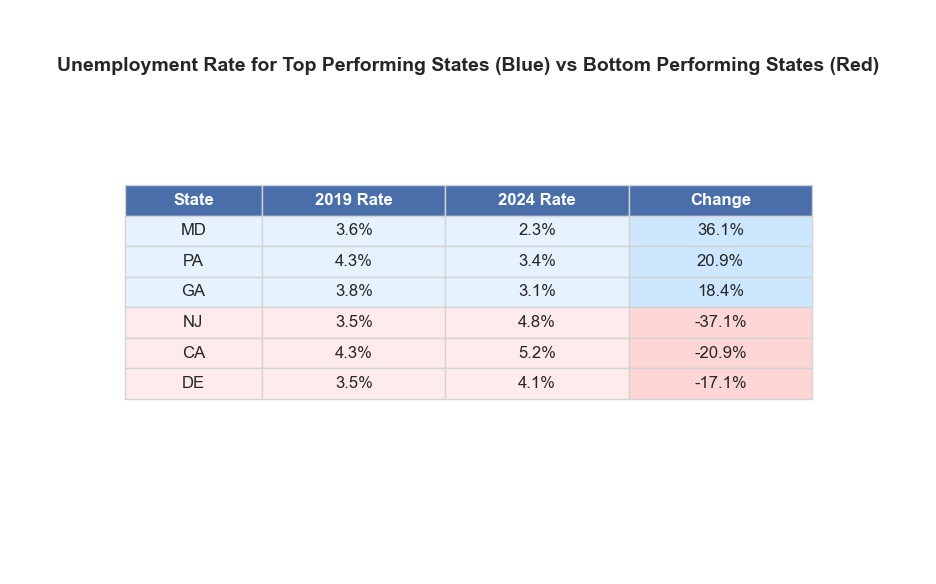

In [1395]:
# --- Table Visualization ---
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.axis('off')  # Hide axes

# Prepare table data - Top Performers
top_data = []
for state in top_states:
    top_data.append([
        state,
        f"{pre_covid[state]:.1f}%",
        f"{post_covid[state]:.1f}%",
        f"{pct_change[state]:.1f}%"  # Removed ▲
    ])

# Prepare table data - Bottom Performers
bottom_data = []
for state in bottom_states:
    bottom_data.append([
        state,
        f"{pre_covid[state]:.1f}%",
        f"{post_covid[state]:.1f}%",
        f"{pct_change[state]:.1f}%"  # Removed ▼
    ])

# Create table
table = plt.table(
    cellText=top_data + bottom_data,
    colLabels=['State', '2019 Rate', f'{post_year} Rate', 'Change'],
    loc='center',
    cellLoc='center',
    colWidths=[0.15, 0.2, 0.2, 0.2]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust cell padding

# Add color and borders
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('lightgray')
    if i == 0:  # Header row
        cell.set_facecolor('#4a6ea9')
        cell.set_text_props(color='white', weight='bold')
    elif i <= len(top_states):  # Top performers
        cell.set_facecolor('#e6f3ff')
    else:  # Bottom performers
        cell.set_facecolor('#ffebeb')
    
    # Highlight change column
    if j == 3:
        if i > 0 and i <= len(top_states):
            cell.set_facecolor('#cce7ff')
        elif i > len(top_states):
            cell.set_facecolor('#ffd6d6')

# Add title
plt.text(0.5, 0.9, 'Unemployment Rate for Top Performing States (Blue) vs Bottom Performing States (Red)', 
         ha='center', va='center', 
         fontsize=14, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()
plt.show()

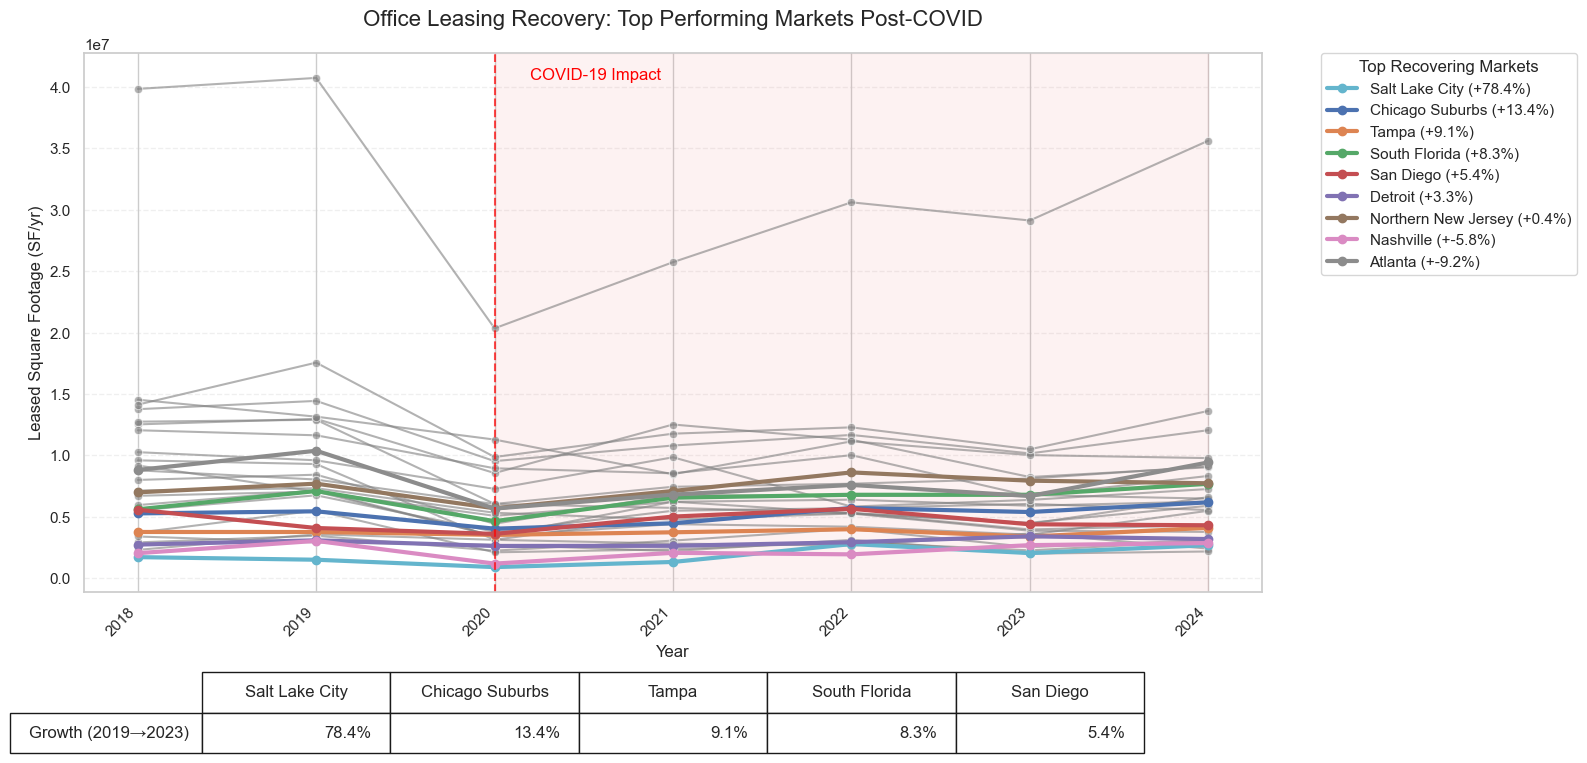

Top 5 Markets by Post-COVID Growth:
         Market  Growth %
 Salt Lake City     78.35
Chicago Suburbs     13.39
          Tampa      9.08
  South Florida      8.30
      San Diego      5.43


In [1397]:
# --- Data Preparation ---
# Calculate post-COVID growth rates (2020-2023)
df_pre = Leases_df[Leases_df['year'] == 2019].groupby('market')['leasedSF'].sum()
df_post = Leases_df[Leases_df['year'] == Leases_df['year'].max()].groupby('market')['leasedSF'].sum()
growth = ((df_post - df_pre) / df_pre * 100).sort_values(ascending=False)

# Get top 9 recovering markets
top_markets = growth.nlargest(9).index.tolist()

# Get ALL unique markets from the data
all_markets = Leases_df['market'].unique()

# --- Enhanced Visualization ---
plt.figure(figsize=(16, 8))

# 1. Plot all markets with standard styling
# First aggregate by year and market
df_trends = Leases_df.groupby(['year', 'market'])['leasedSF'].sum().reset_index()

ax = sns.lineplot(
    data=df_trends,
    x='year',
    y='leasedSF',
    hue='market',
    marker='o',
    palette={m: 'gray' for m in all_markets},  # Use all markets found in data
    alpha=0.6,
    legend=False
)

# 2. Highlight top recovering markets
for market in top_markets:
    market_data = df_trends[df_trends['market'] == market]
    ax.plot(
        market_data['year'],
        market_data['leasedSF'],
        marker='o',
        linewidth=3,
        label=f"{market} (+{growth[market]:.1f}%)"
    )

# 3. COVID annotations
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, ax.get_ylim()[1]*0.95, "COVID-19 Impact", color='red')

# 4. Add growth rate table
growth_table = growth.head(5).reset_index()
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{row[1]:.1f}%" for row in growth_table.values]]
plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# 5. Formatting
plt.title('Office Leasing Recovery: Top Performing Markets Post-COVID', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leased Square Footage (SF/yr)', fontsize=12)
plt.xticks(df_trends['year'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 6. Compact legend
plt.legend(
    title='Top Recovering Markets',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make space for table
plt.show()

# Print growth data
print("Top 5 Markets by Post-COVID Growth:")
print(growth_table.to_string(index=False))

In [1398]:
Leases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            194685 non-null  int64  
 1   quarter                         194685 non-null  object 
 2   monthsigned                     193822 non-null  float64
 3   market                          194685 non-null  object 
 4   building_name                   157999 non-null  object 
 5   building_id                     194685 non-null  object 
 6   address                         194685 non-null  object 
 7   region                          194685 non-null  object 
 8   city                            194685 non-null  object 
 9   state                           194685 non-null  object 
 10  zip                             194684 non-null  float64
 11  internal_submarket              194685 non-null  object 
 12  internal_class  

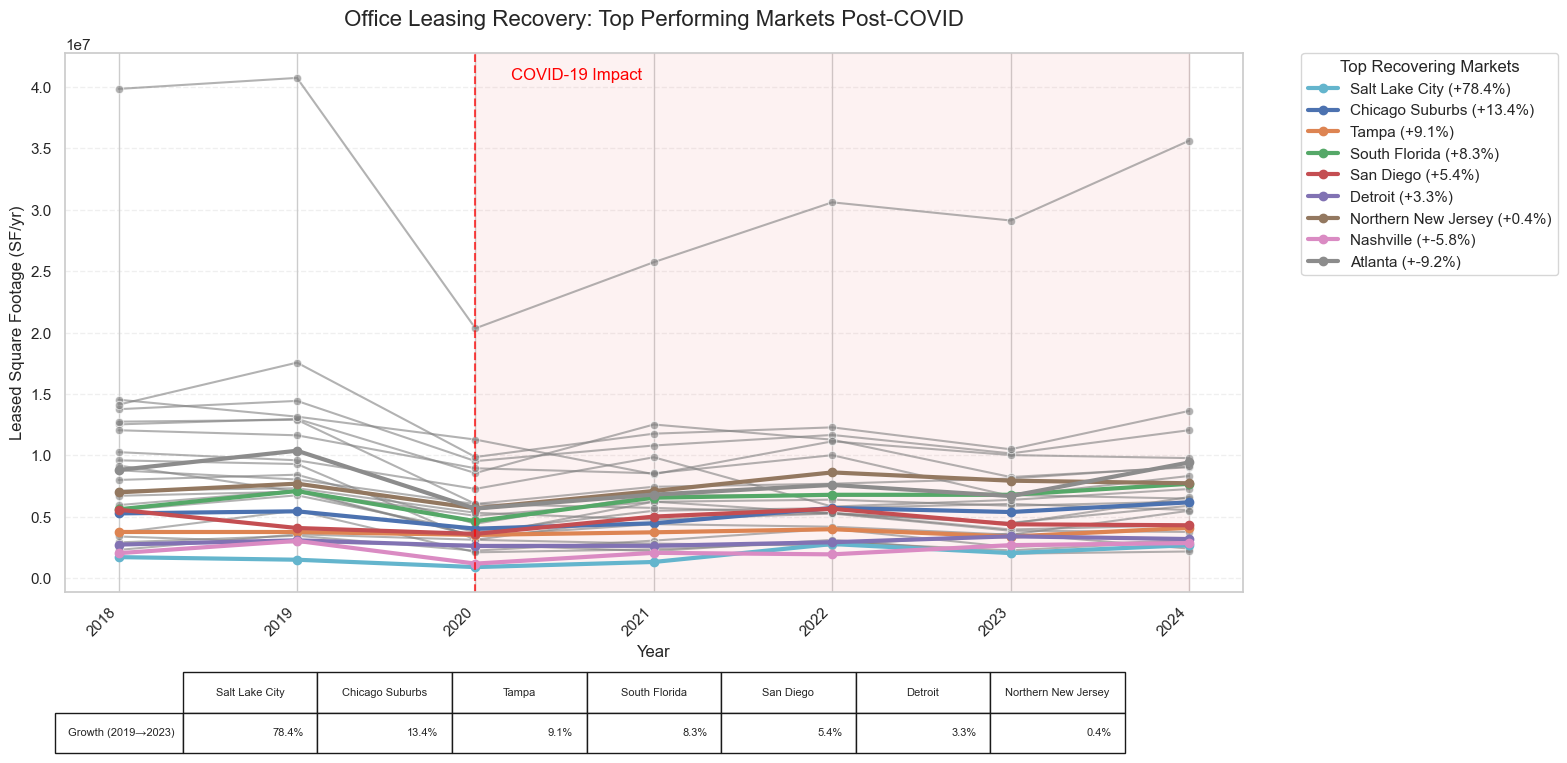

Top 7 Markets by Post-COVID Growth:
             Market  Growth %
     Salt Lake City     78.35
    Chicago Suburbs     13.39
              Tampa      9.08
      South Florida      8.30
          San Diego      5.43
            Detroit      3.31
Northern New Jersey      0.43


In [1399]:
# --- Data Preparation ---
# Calculate post-COVID growth rates (2020-2023)
df_pre = Leases_df[Leases_df['year'] == 2019].groupby('market')['leasedSF'].sum()
df_post = Leases_df[Leases_df['year'] == Leases_df['year'].max()].groupby('market')['leasedSF'].sum()
growth = ((df_post - df_pre) / df_pre * 100).sort_values(ascending=False)

# Get top 9 recovering markets
top_markets = growth.nlargest(9).index.tolist()

# Get ALL unique markets from the data
all_markets = Leases_df['market'].unique()

# --- Enhanced Visualization ---
plt.figure(figsize=(16, 8))

# 1. Plot all markets with standard styling
# First aggregate by year and market
df_trends = Leases_df.groupby(['year', 'market'])['leasedSF'].sum().reset_index()

ax = sns.lineplot(
    data=df_trends,
    x='year',
    y='leasedSF',
    hue='market',
    marker='o',
    palette={m: 'gray' for m in all_markets},  # Use all markets found in data
    alpha=0.6,
    legend=False
)

# 2. Highlight top recovering markets
for market in top_markets:
    market_data = df_trends[df_trends['market'] == market]
    ax.plot(
        market_data['year'],
        market_data['leasedSF'],
        marker='o',
        linewidth=3,
        label=f"{market} (+{growth[market]:.1f}%)"
    )

# 3. COVID annotations
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, ax.get_ylim()[1]*0.95, "COVID-19 Impact", color='red')

# 4. Add growth rate table
growth_table = growth.head(7).reset_index()
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{row[1]:.1f}%" for row in growth_table.values]]
plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# 5. Formatting
plt.title('Office Leasing Recovery: Top Performing Markets Post-COVID', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leased Square Footage (SF/yr)', fontsize=12)
plt.xticks(df_trends['year'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 6. Compact legend
plt.legend(
    title='Top Recovering Markets',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make space for table
plt.show()

# Print growth data
print("Top 7 Markets by Post-COVID Growth:")
print(growth_table.to_string(index=False))

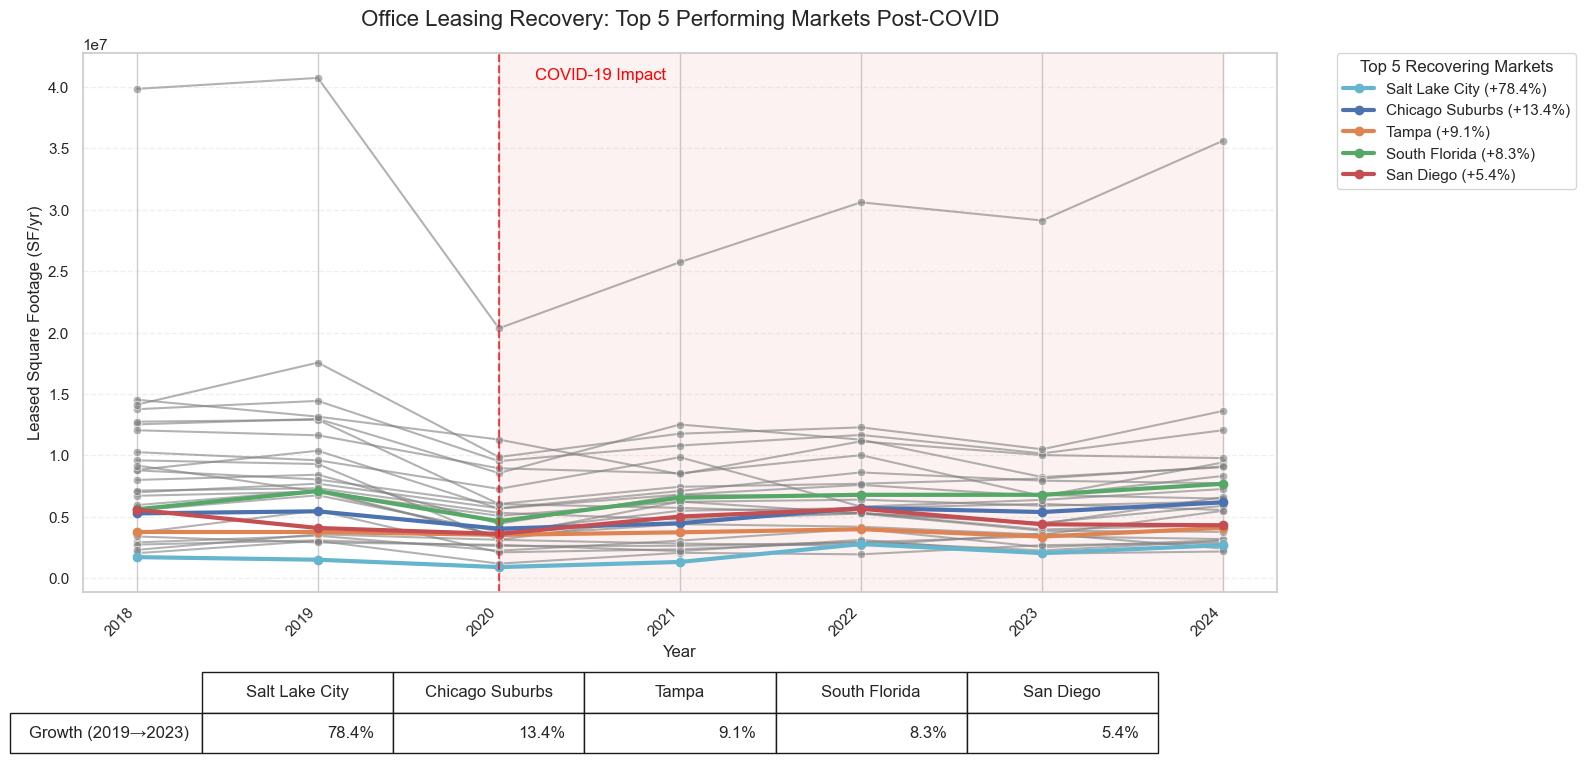

Top 5 Markets by Post-COVID Growth:
         Market  Growth %
 Salt Lake City     78.35
Chicago Suburbs     13.39
          Tampa      9.08
  South Florida      8.30
      San Diego      5.43


In [1400]:
# --- Data Preparation ---
# Calculate post-COVID growth rates (2020-2023)
df_pre = Leases_df[Leases_df['year'] == 2019].groupby('market')['leasedSF'].sum()
df_post = Leases_df[Leases_df['year'] == Leases_df['year'].max()].groupby('market')['leasedSF'].sum()
growth = ((df_post - df_pre) / df_pre * 100).sort_values(ascending=False)

# Get top 5 recovering markets (changed from 9 to 5)
top_markets = growth.nlargest(5).index.tolist()

# Get ALL unique markets from the data
all_markets = Leases_df['market'].unique()

# --- Enhanced Visualization ---
plt.figure(figsize=(16, 8))

# 1. Plot all markets with standard styling
# First aggregate by year and market
df_trends = Leases_df.groupby(['year', 'market'])['leasedSF'].sum().reset_index()

ax = sns.lineplot(
    data=df_trends,
    x='year',
    y='leasedSF',
    hue='market',
    marker='o',
    palette={m: 'gray' for m in all_markets},
    alpha=0.6,
    legend=False
)

# 2. Highlight top 5 recovering markets
for market in top_markets:
    market_data = df_trends[df_trends['market'] == market]
    ax.plot(
        market_data['year'],
        market_data['leasedSF'],
        marker='o',
        linewidth=3,
        label=f"{market} (+{growth[market]:.1f}%)"
    )

# 3. COVID annotations
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, ax.get_ylim()[1]*0.95, "COVID-19 Impact", color='red')

# 4. Add growth rate table (changed to top 5)
growth_table = growth.head(5).reset_index()  # Changed from 7 to 5
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{row[1]:.1f}%" for row in growth_table.values]]
plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# 5. Formatting
plt.title('Office Leasing Recovery: Top 5 Performing Markets Post-COVID', fontsize=16, pad=20)  # Updated title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leased Square Footage (SF/yr)', fontsize=12)
plt.xticks(df_trends['year'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 6. Compact legend
plt.legend(
    title='Top 5 Recovering Markets',  # Updated legend title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make space for table
plt.show()

# Print growth data (changed to top 5)
print("Top 5 Markets by Post-COVID Growth:")
print(growth_table.to_string(index=False))

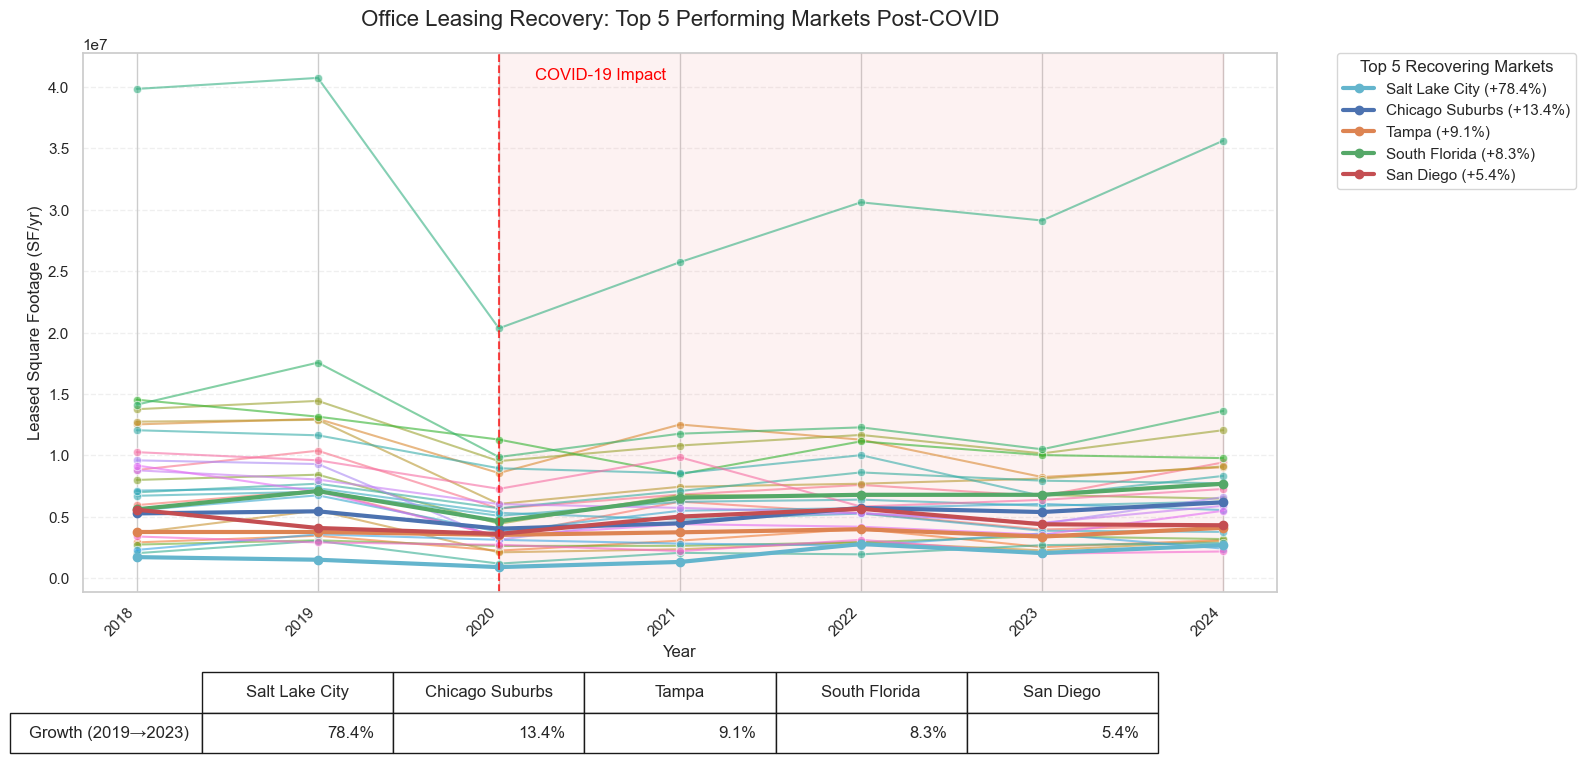

Top 5 Markets by Post-COVID Growth:
         Market  Growth %
 Salt Lake City     78.35
Chicago Suburbs     13.39
          Tampa      9.08
  South Florida      8.30
      San Diego      5.43


In [1401]:
# --- Data Preparation ---
# Calculate post-COVID growth rates (2020-2023)
df_pre = Leases_df[Leases_df['year'] == 2019].groupby('market')['leasedSF'].sum()
df_post = Leases_df[Leases_df['year'] == Leases_df['year'].max()].groupby('market')['leasedSF'].sum()
growth = ((df_post - df_pre) / df_pre * 100).sort_values(ascending=False)

# Get top 5 recovering markets 
top_markets = growth.nlargest(5).index.tolist()

# Get ALL unique markets from the data
all_markets = Leases_df['market'].unique()

# --- Enhanced Visualization ---
plt.figure(figsize=(16, 8))

# 1. Plot all markets with standard styling
# First aggregate by year and market
df_trends = Leases_df.groupby(['year', 'market'])['leasedSF'].sum().reset_index()

ax = sns.lineplot(
    data=df_trends,
    x='year',
    y='leasedSF',
    hue='market',
    marker='o',
    alpha=0.6,
    legend=False
)

# 2. Highlight top recovering markets (now only 5)
for market in top_markets:
    market_data = df_trends[df_trends['market'] == market]
    ax.plot(
        market_data['year'],
        market_data['leasedSF'],
        marker='o',
        linewidth=3,
        label=f"{market} (+{growth[market]:.1f}%)"
    )

# 3. COVID annotations
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, ax.get_ylim()[1]*0.95, "COVID-19 Impact", color='red')

# 4. Add growth rate table (changed to show top 5)
growth_table = growth.head(5).reset_index()
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{row[1]:.1f}%" for row in growth_table.values]]
plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# 5. Formatting
plt.title('Office Leasing Recovery: Top 5 Performing Markets Post-COVID', fontsize=16, pad=20)  # Updated title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leased Square Footage (SF/yr)', fontsize=12)
plt.xticks(df_trends['year'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 6. Compact legend
plt.legend(
    title='Top 5 Recovering Markets',  # Updated legend title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make space for table
plt.show()

# Print growth data (updated to show top 5)
print("Top 5 Markets by Post-COVID Growth:")
print(growth_table.to_string(index=False))

/var/folders/70/58_fmkvx1rv29ckl5tw1vyb00000gn/T/ipykernel_5014/2063699973.py:61: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



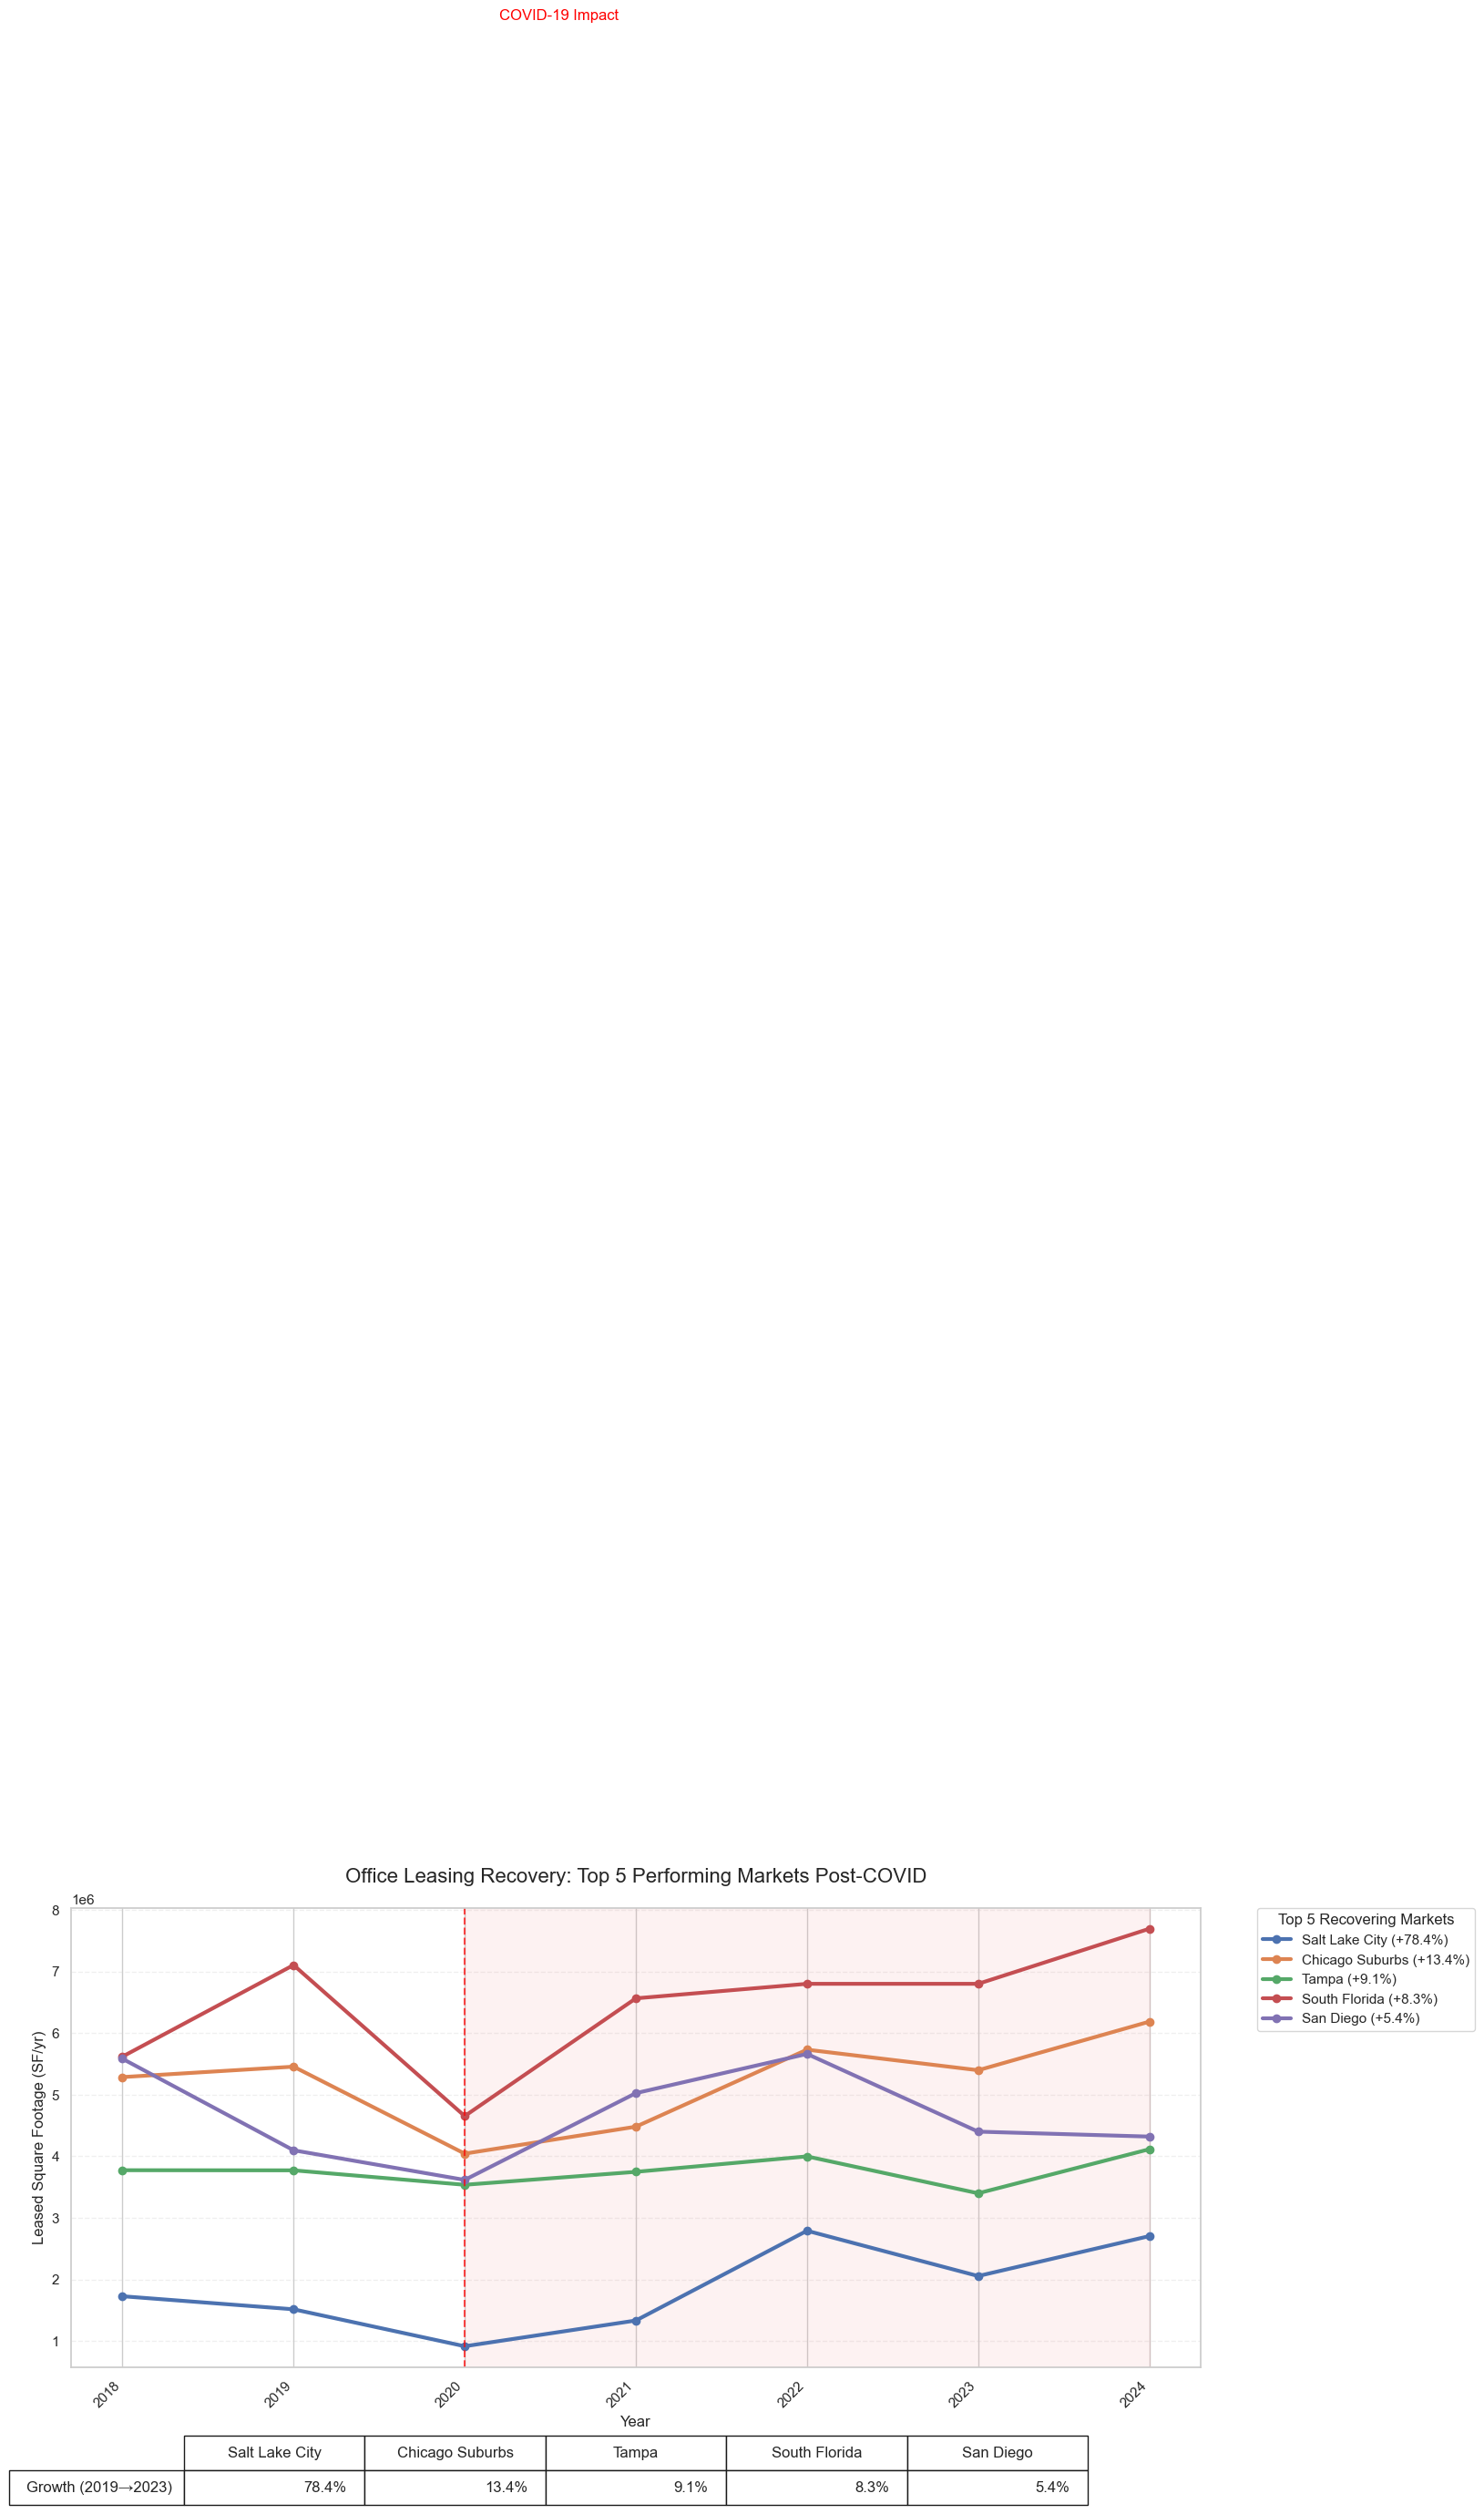

Top 5 Markets by Post-COVID Growth:
         Market  Growth %
 Salt Lake City     78.35
Chicago Suburbs     13.39
          Tampa      9.08
  South Florida      8.30
      San Diego      5.43


In [1402]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
df_pre = Leases_df[Leases_df['year'] == 2019].groupby('market')['leasedSF'].sum()
df_post = Leases_df[Leases_df['year'] == Leases_df['year'].max()].groupby('market')['leasedSF'].sum()
growth = ((df_post - df_pre) / df_pre * 100).sort_values(ascending=False)

# Top 5 markets
top_markets = growth.nlargest(5).index.tolist()

# Aggregate leasing trends
df_trends = Leases_df.groupby(['year', 'market'])['leasedSF'].sum().reset_index()

# --- Visualization ---
plt.figure(figsize=(16, 8))

# Only plot top 5 markets (no gray background)
for market in top_markets:
    market_data = df_trends[df_trends['market'] == market]
    plt.plot(
        market_data['year'],
        market_data['leasedSF'],
        marker='o',
        linewidth=3,
        label=f"{market} (+{growth[market]:.1f}%)"
    )

# COVID annotation
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, df_trends['leasedSF'].max()*0.95, "COVID-19 Impact", color='red')

# Growth rate table
growth_table = growth.head(5).reset_index()
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{row[1]:.1f}%" for row in growth_table.values]]
plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# Formatting
plt.title('Office Leasing Recovery: Top 5 Performing Markets Post-COVID', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leased Square Footage (SF/yr)', fontsize=12)
plt.xticks(df_trends['year'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Legend
plt.legend(
    title='Top 5 Recovering Markets',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

# Print table
print("Top 5 Markets by Post-COVID Growth:")
print(growth_table.to_string(index=False))


/var/folders/70/58_fmkvx1rv29ckl5tw1vyb00000gn/T/ipykernel_5014/483013402.py:63: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



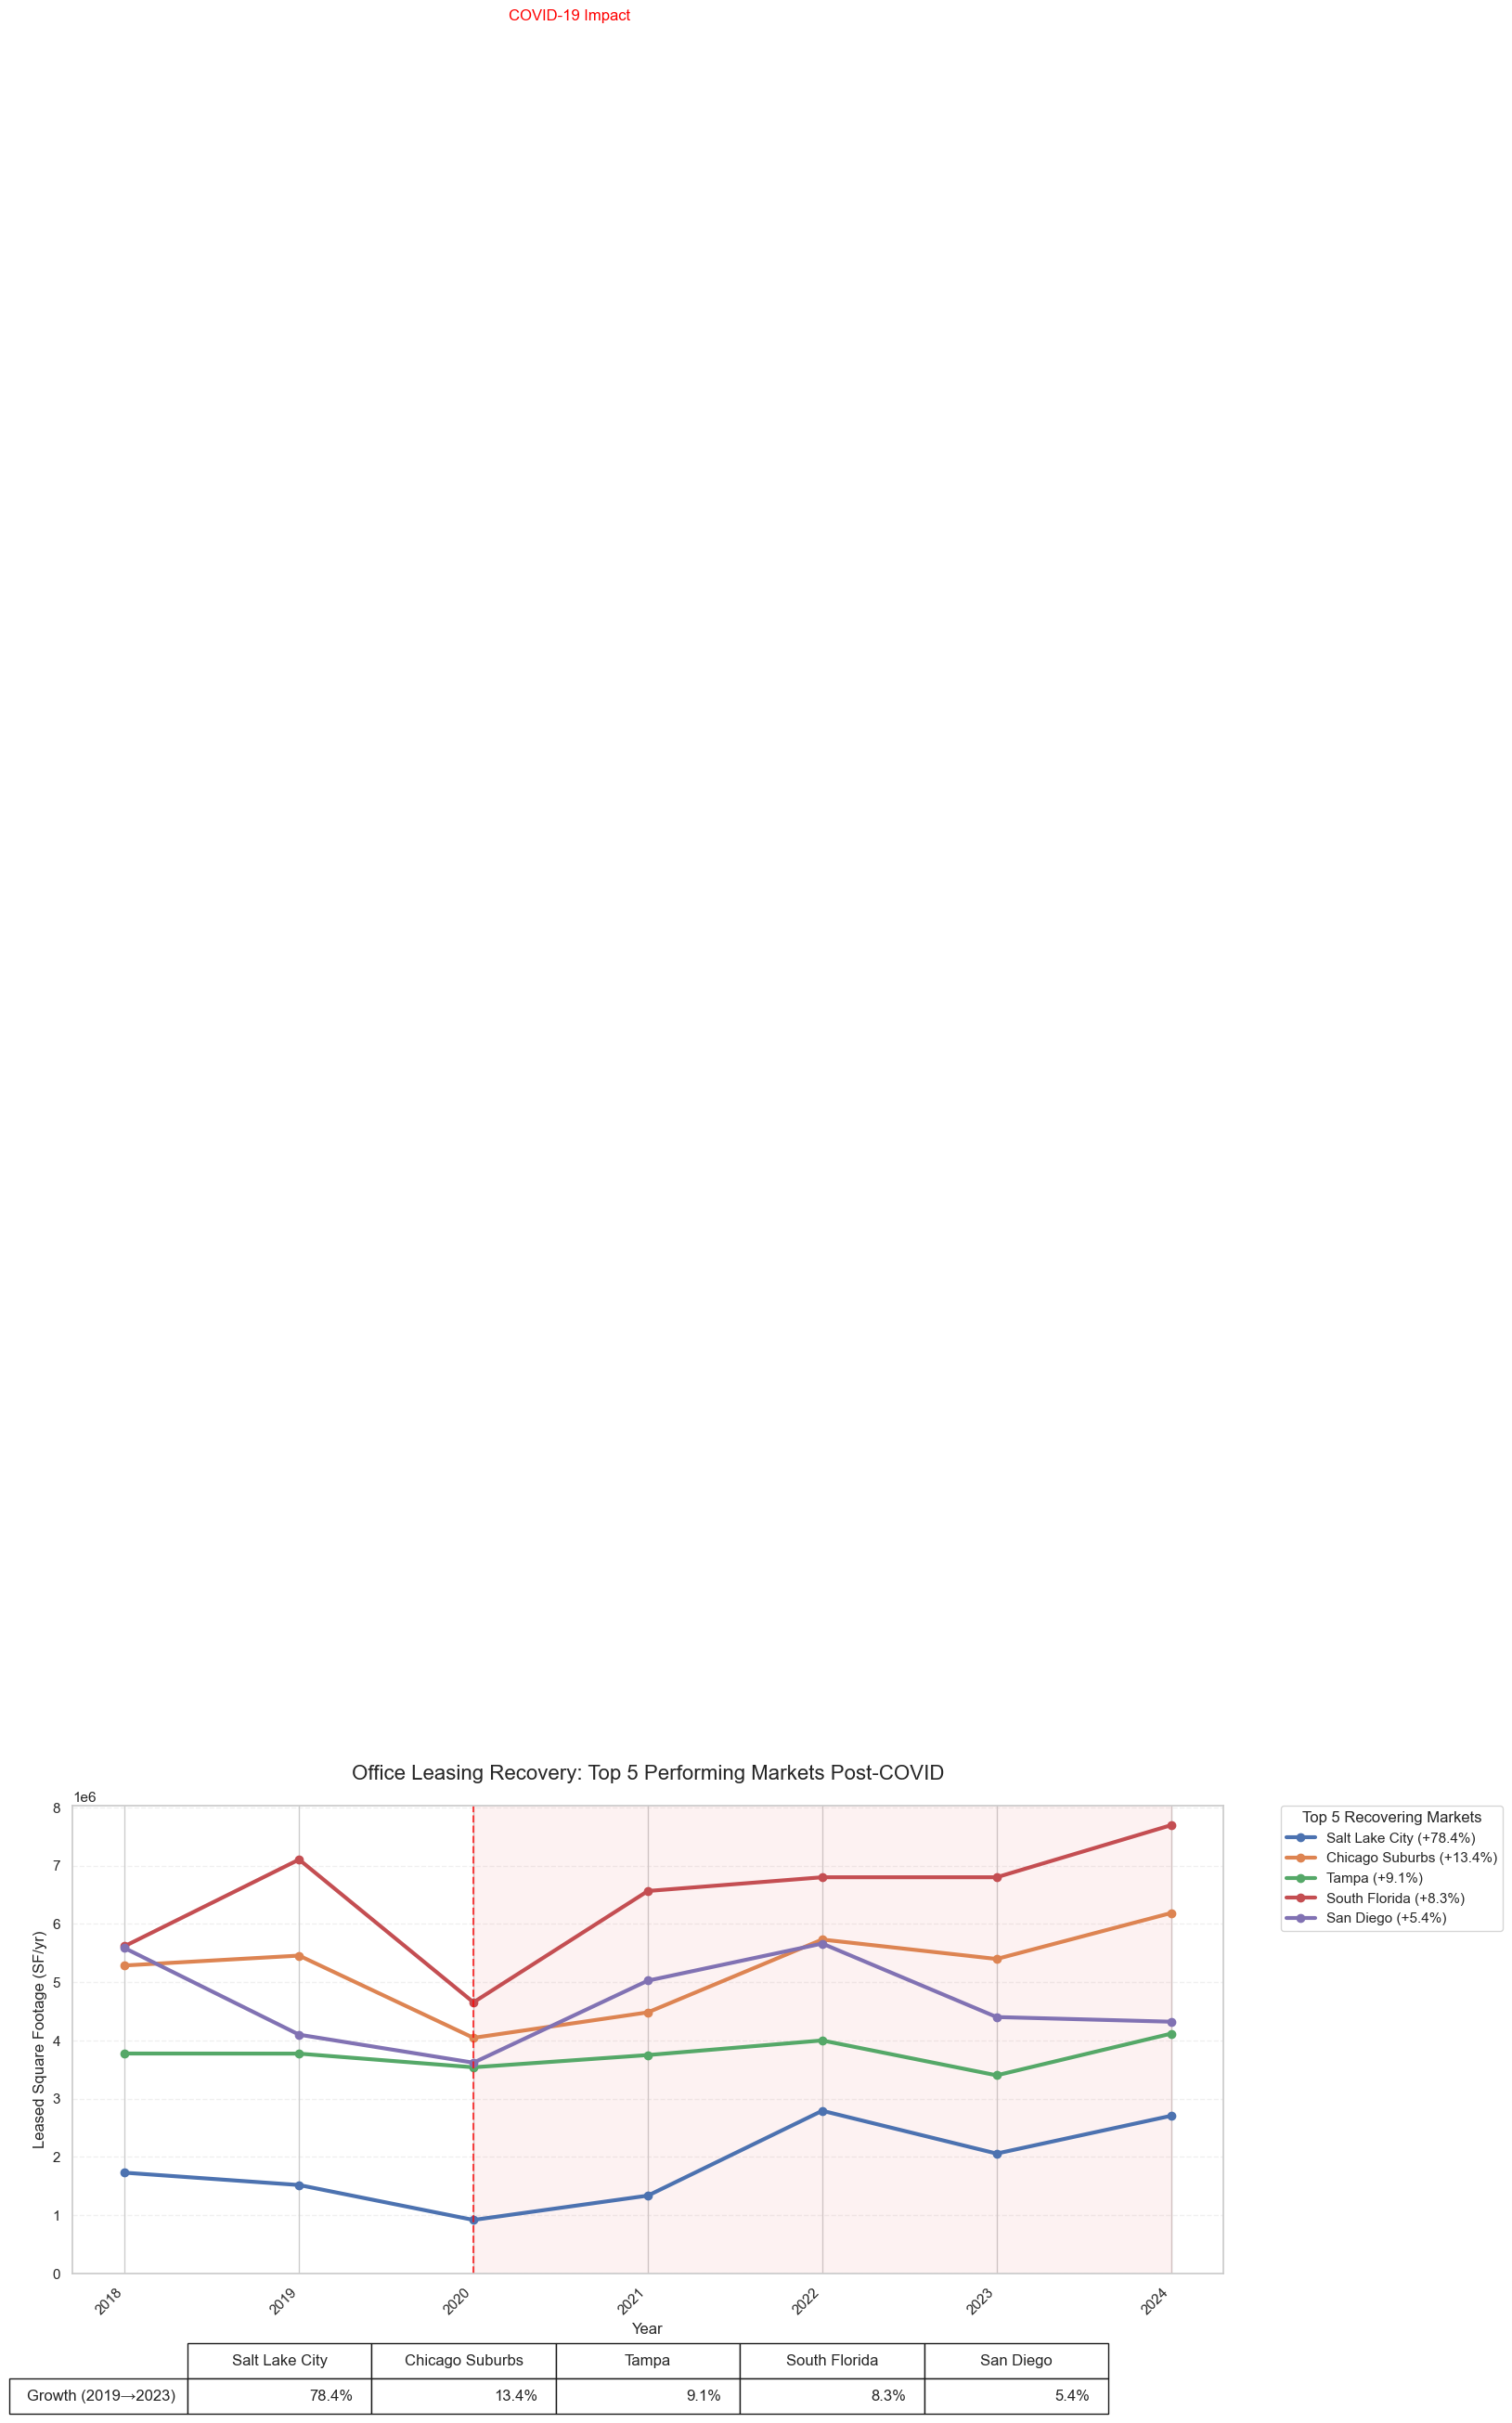

Top 5 Markets by Post-COVID Growth:
         Market  Growth %
 Salt Lake City     78.35
Chicago Suburbs     13.39
          Tampa      9.08
  South Florida      8.30
      San Diego      5.43


In [1403]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
df_pre = Leases_df[Leases_df['year'] == 2019].groupby('market')['leasedSF'].sum()
df_post = Leases_df[Leases_df['year'] == Leases_df['year'].max()].groupby('market')['leasedSF'].sum()
growth = ((df_post - df_pre) / df_pre * 100).sort_values(ascending=False)

# Top 5 markets
top_markets = growth.nlargest(5).index.tolist()

# Aggregate leasing trends
df_trends = Leases_df.groupby(['year', 'market'])['leasedSF'].sum().reset_index()

# --- Visualization ---
plt.figure(figsize=(16, 8))

# Only plot top 5 markets (no gray background)
for market in top_markets:
    market_data = df_trends[df_trends['market'] == market]
    plt.plot(
        market_data['year'],
        market_data['leasedSF'],
        marker='o',
        linewidth=3,
        label=f"{market} (+{growth[market]:.1f}%)"
    )

# COVID annotation
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, df_trends['leasedSF'].max()*0.95, "COVID-19 Impact", color='red')

# Growth rate table
growth_table = growth.head(5).reset_index()
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{value:.1f}%" for value in growth_table['Growth %']]]

plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# Formatting
plt.title('Office Leasing Recovery: Top 5 Performing Markets Post-COVID', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leased Square Footage (SF/yr)', fontsize=12)
plt.xticks(df_trends['year'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(bottom=0)  # <-- Ensure Y-axis starts from 0

# Legend
plt.legend(
    title='Top 5 Recovering Markets',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

# Print table
print("Top 5 Markets by Post-COVID Growth:")
print(growth_table.to_string(index=False))


/var/folders/70/58_fmkvx1rv29ckl5tw1vyb00000gn/T/ipykernel_5014/1661664770.py:63: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



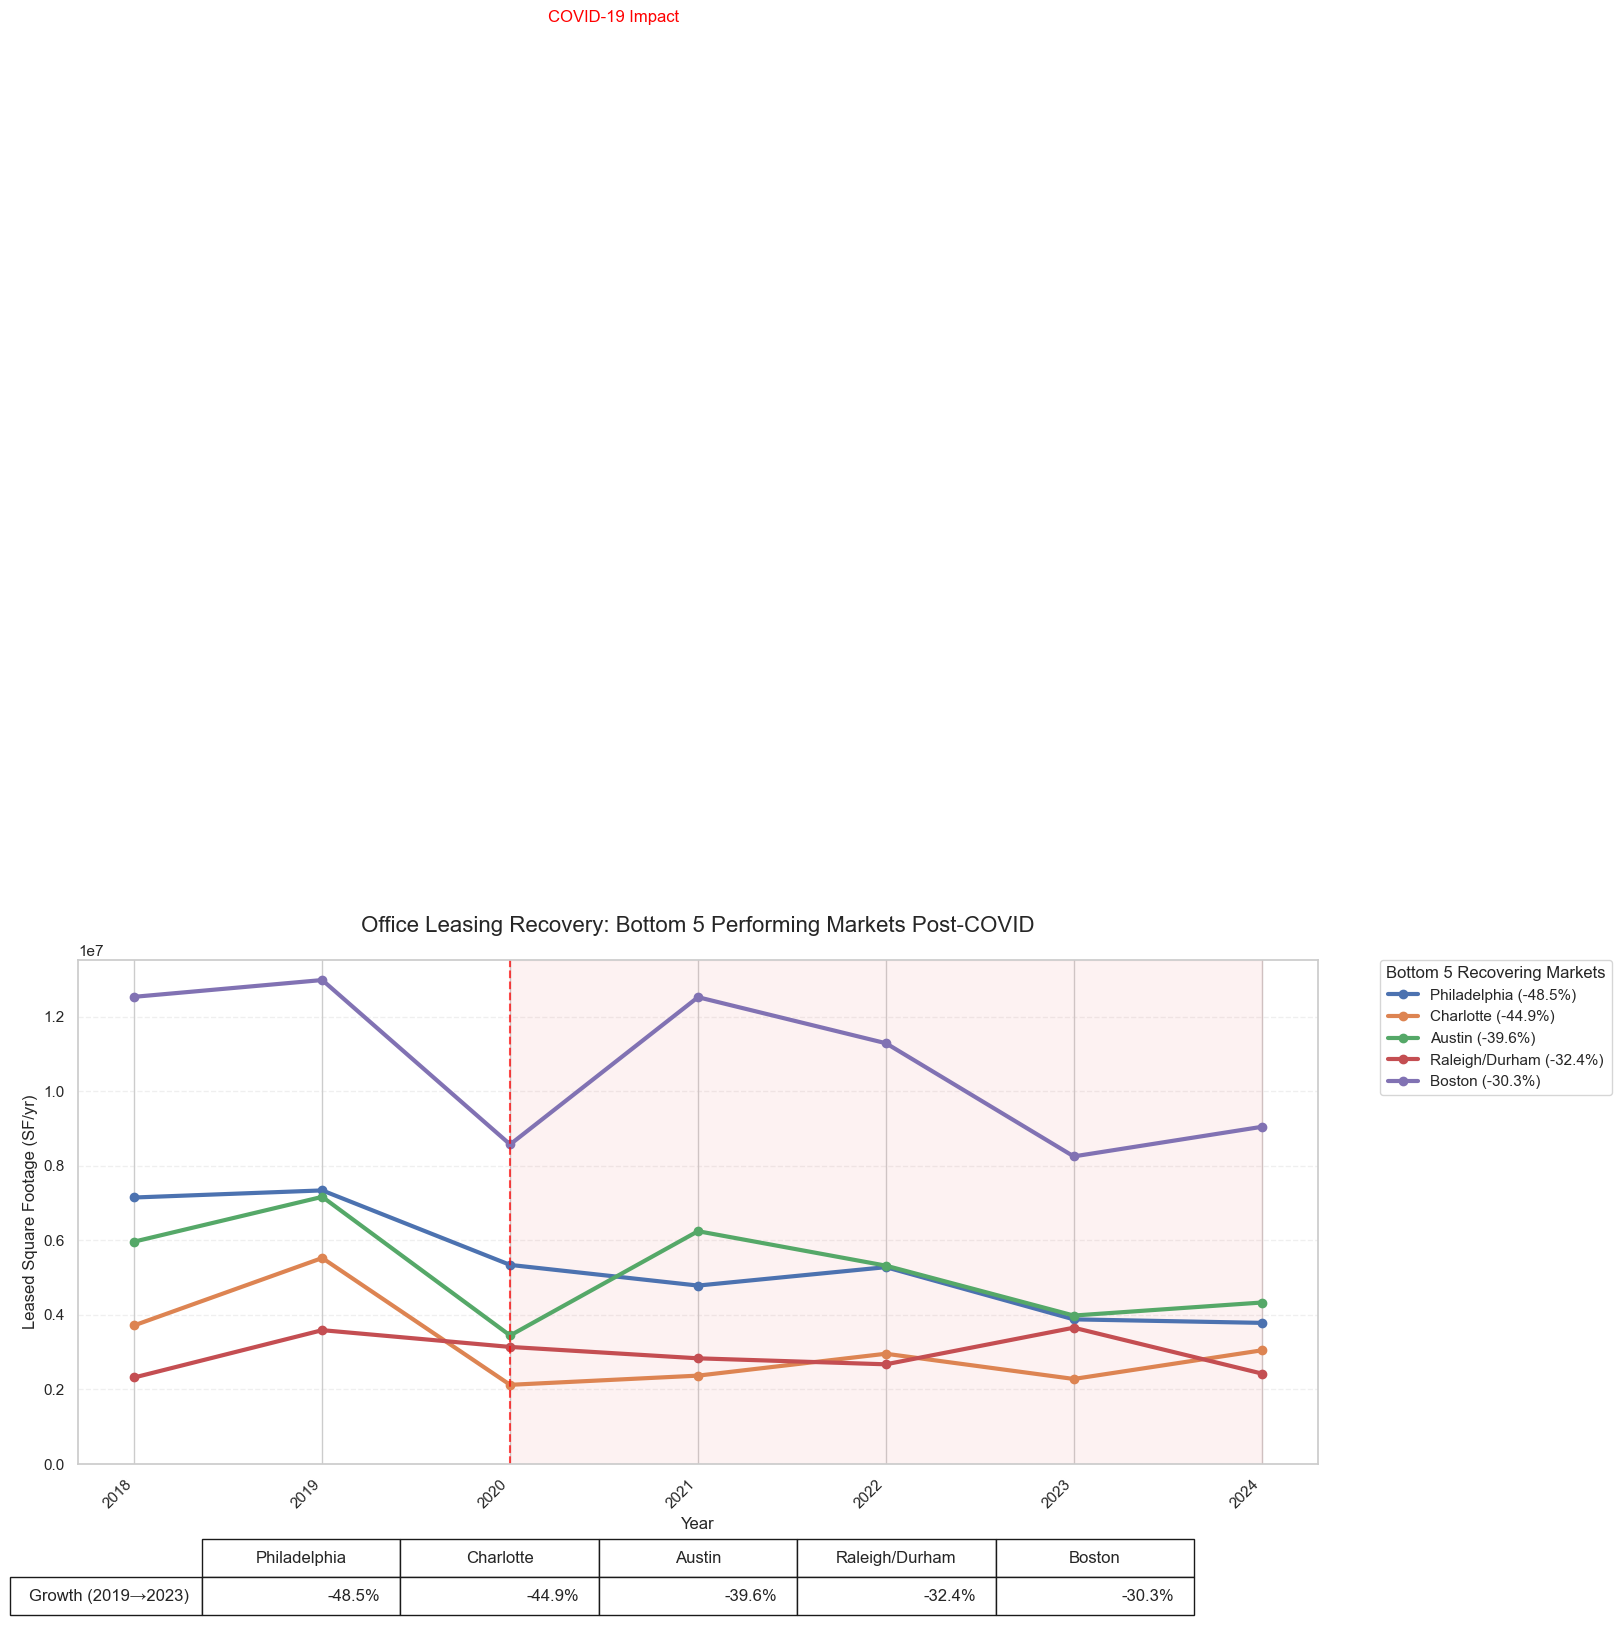

Bottom 5 Markets by Post-COVID Growth:
        Market  Growth %
  Philadelphia    -48.45
     Charlotte    -44.87
        Austin    -39.59
Raleigh/Durham    -32.44
        Boston    -30.35


In [1404]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
df_pre = Leases_df[Leases_df['year'] == 2019].groupby('market')['leasedSF'].sum()
df_post = Leases_df[Leases_df['year'] == Leases_df['year'].max()].groupby('market')['leasedSF'].sum()
growth = ((df_post - df_pre) / df_pre * 100).sort_values()

# Get bottom 5 markets (worst performance)
bottom_markets = growth.nsmallest(5).index.tolist()

# Aggregate leasing trends
df_trends = Leases_df.groupby(['year', 'market'])['leasedSF'].sum().reset_index()

# --- Visualization ---
plt.figure(figsize=(16, 8))

# Only plot bottom 5 markets
for market in bottom_markets:
    market_data = df_trends[df_trends['market'] == market]
    plt.plot(
        market_data['year'],
        market_data['leasedSF'],
        marker='o',
        linewidth=3,
        label=f"{market} ({growth[market]:+.1f}%)"
    )

# --- COVID annotation
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.axvspan(2020, df_trends['year'].max(), color='lightcoral', alpha=0.1)
plt.text(2020.2, df_trends['leasedSF'].max()*0.95, "COVID-19 Impact", color='red')

# --- Growth table for bottom 5
growth_table = growth.head(5).reset_index()
growth_table.columns = ['Market', 'Growth %']
cell_text = [[f"{value:.1f}%" for value in growth_table['Growth %']]]

plt.table(
    cellText=cell_text,
    rowLabels=['Growth (2019→2023)'],
    colLabels=growth_table['Market'],
    loc='bottom',
    bbox=[0.1, -0.3, 0.8, 0.15]
)

# --- Formatting
plt.title('Office Leasing Recovery: Bottom 5 Performing Markets Post-COVID', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leased Square Footage (SF/yr)', fontsize=12)
plt.xticks(df_trends['year'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(bottom=0)  # Ensure y-axis starts at 0

# --- Legend
plt.legend(
    title='Bottom 5 Recovering Markets',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make space for the table
plt.show()

# --- Print growth data
print("Bottom 5 Markets by Post-COVID Growth:")
print(growth_table.to_string(index=False))


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

invalid value encountered in multiply



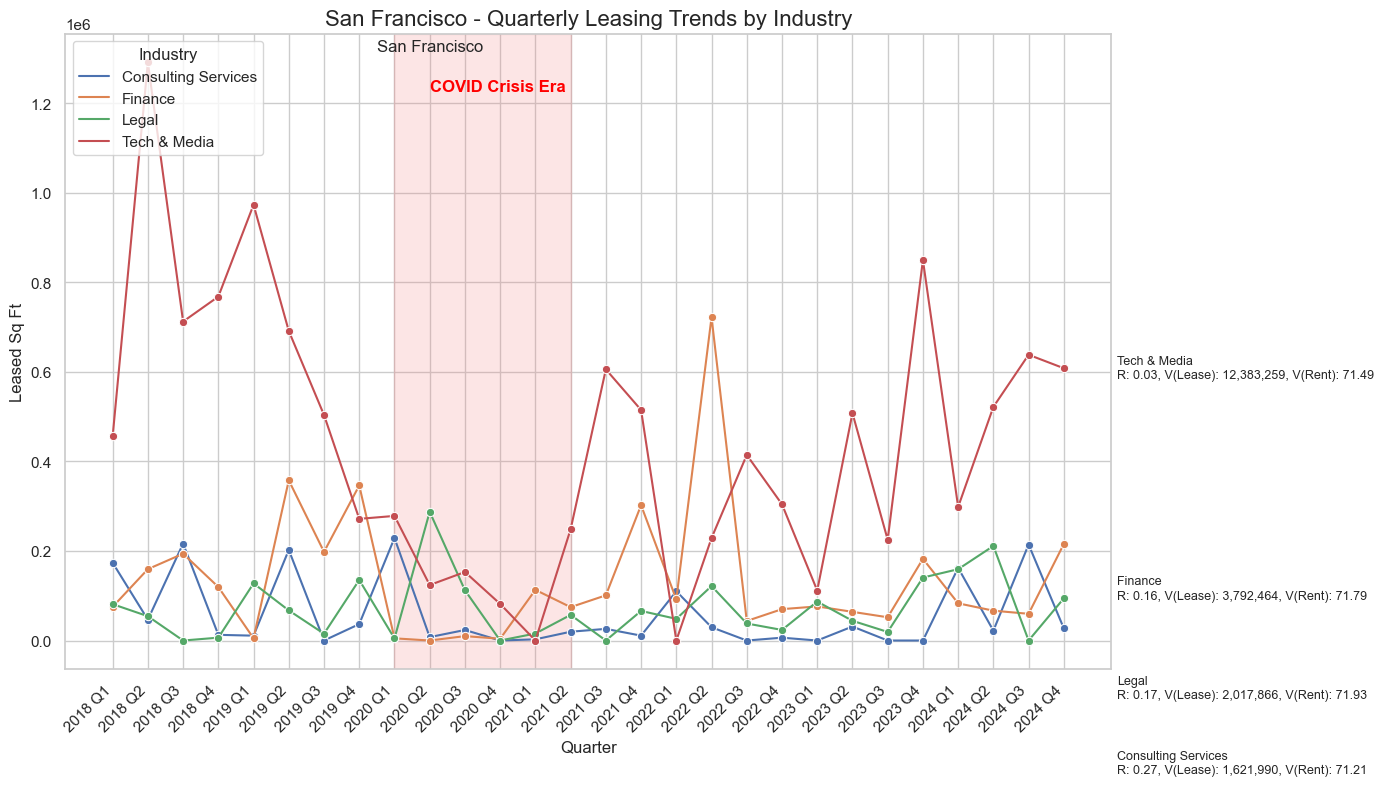

Summary Stats per Industry:
                                                                                                        R     V_Lease  V_Rent
internal_industry                                                                                                            
Technology, Advertising, Media, and Information                                                      0.03 12383259.00   71.49
Financial Services and Insurance                                                                     0.16  3792464.00   71.79
Legal Services                                                                                       0.17  2017866.00   71.93
Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting  0.27  1621990.00   71.21
Retail                                                                                               0.06  1323664.00   72.80
Coworking and Executive Suite Companies                                                   

In [1405]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Filter to a single market (e.g., Dallas)
market_name = "San Francisco"
df_sf = Leases_df[
    (Leases_df["market"] == market_name) & 
    (Leases_df["internal_industry"].notna())
].copy()

# --- Prepare quarterly time column
df_sf['time'] = df_sf['year'].astype(str) + ' ' + df_sf['quarter']
df_sf['time'] = pd.Categorical(
    df_sf['time'], 
    categories=sorted(df_sf['time'].unique(), key=lambda x: (int(x.split()[0]), x.split()[1])), 
    ordered=True
)

# --- Aggregate leased SF by industry and time
df_plot = df_sf.groupby(['time', 'internal_industry'])['leasedSF'].sum().reset_index()

# --- Calculate summary stats per industry
summary = df_sf.groupby('internal_industry').agg(
    R=('leasedSF', lambda x: x.corr(df_sf.loc[x.index, 'overall_rent'])),
    V_Lease=('leasedSF', 'sum'),
    V_Rent=('overall_rent', 'mean')
).dropna().round(2).sort_values('V_Lease', ascending=False)

top_industries = summary.head(4).index.tolist()

# --- Shortened labels for display
label_names = {
    "Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting": "Consulting Services",
    "Technology, Advertising, Media, and Information": "Tech & Media",
    "Financial Services and Insurance": "Finance",
    "Legal Services": "Legal"
}

# --- Add short name column to the plot DataFrame
df_plot_top = df_plot[df_plot['internal_industry'].isin(top_industries)].copy()
df_plot_top['industry_short'] = df_plot_top['internal_industry'].map(label_names)

# --- Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot_top, x='time', y='leasedSF', hue='industry_short', marker='o')

# --- COVID annotation
plt.axvspan('2020 Q1', '2021 Q2', color='lightcoral', alpha=0.2)
plt.text('2020 Q2', df_plot['leasedSF'].max() * 0.95, "COVID Crisis Era", color='red', fontsize=12, weight='bold')
plt.text('2020 Q2', df_plot['leasedSF'].max() * 1.02, market_name, ha='center', fontsize=12)

# --- Annotate final values (with shortened names)
label_spacing = 100000
y_offset = 0

for industry in top_industries:
    data = summary.loc[industry]
    short_name = label_names.get(industry, industry)
    industry_df = df_plot_top[df_plot_top['internal_industry'] == industry]
    y_val = industry_df['leasedSF'].iloc[-1] + y_offset

    plt.text(
        len(df_plot['time'].unique()) + 0.5,
        y_val,
        f"{short_name}\nR: {data.R:.2f}, V(Lease): {int(data.V_Lease):,}, V(Rent): {data.V_Rent:.2f}",
        fontsize=9,
        va='center'
    )

    y_offset -= label_spacing

# --- Aesthetics
plt.title(f"{market_name} - Quarterly Leasing Trends by Industry", fontsize=16)
plt.ylabel("Leased Sq Ft")
plt.xlabel("Quarter")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Industry", loc='upper left')
plt.tight_layout()
plt.show()

# --- Summary Table
print("Summary Stats per Industry:")
print(summary.head(10).to_string())


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



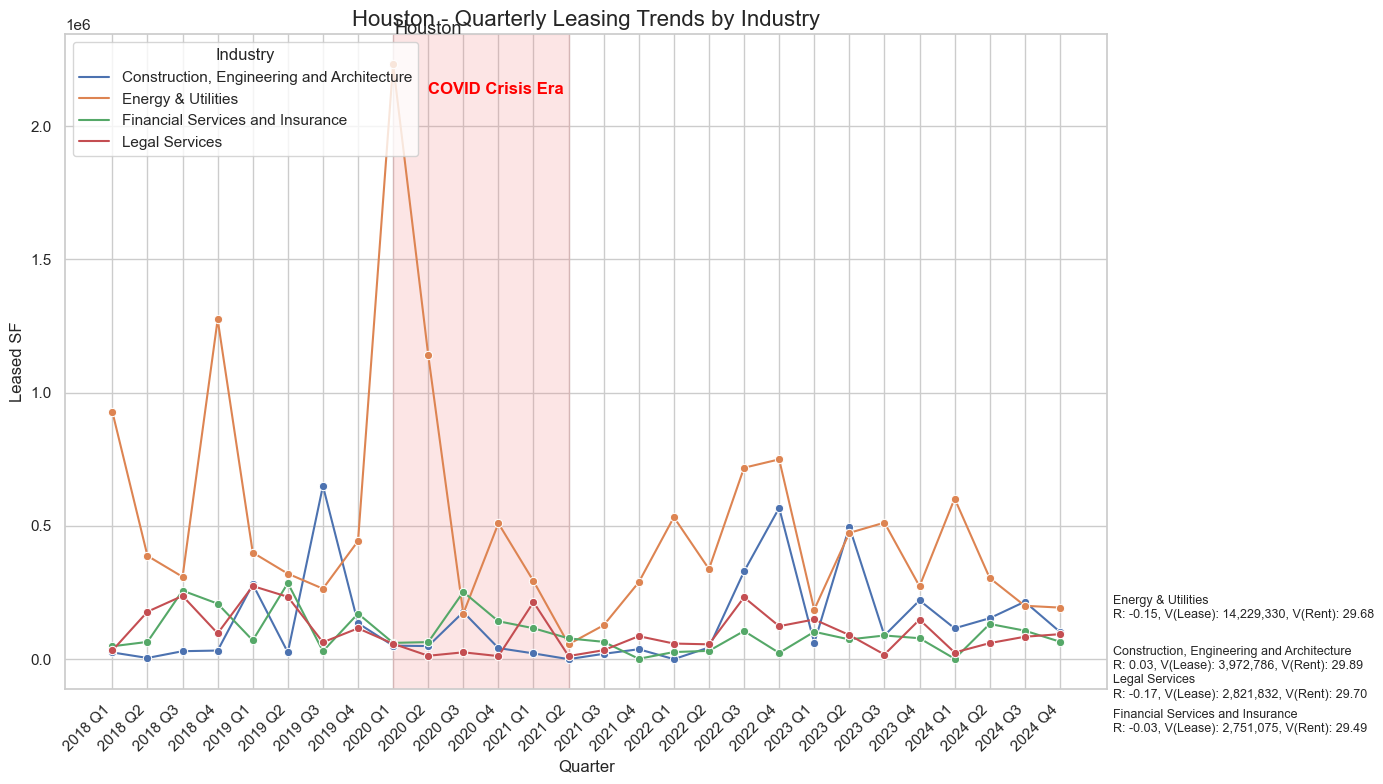

Summary Stats per Industry:
                                                                                                        R     V_Lease  V_Rent
internal_industry                                                                                                            
Energy & Utilities                                                                                  -0.15 14229330.00   29.68
Construction, Engineering and Architecture                                                           0.03  3972786.00   29.89
Legal Services                                                                                      -0.17  2821832.00   29.70
Financial Services and Insurance                                                                    -0.03  2751075.00   29.49
Technology, Advertising, Media, and Information                                                     -0.13  1873378.00   29.53
Business, Professional, and Consulting Services (except Financial and Legal) - Including A

In [1462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set market
market_name = "Houston"

# --- Filter for city and valid industries
df_market = Leases_df[
    (Leases_df["market"] == market_name) &
    (Leases_df["internal_industry"].notna()) &
    (Leases_df["quarter"].isin(["Q1", "Q2", "Q3", "Q4"]))  # ensure clean quarters
].copy()

# --- Create valid time axis from year + quarter
df_market['time'] = df_market['year'].astype(str) + ' ' + df_market['quarter']
df_market['time'] = pd.Categorical(
    df_market['time'],
    categories=sorted(df_market['time'].unique(), key=lambda x: (int(x.split()[0]), x.split()[1])),
    ordered=True
)

# --- Aggregate leased SF by time and industry
df_plot = df_market.groupby(['time', 'internal_industry'])['leasedSF'].sum().reset_index()

# --- Calculate summary stats: correlation, volume, rent
summary = df_market.groupby('internal_industry').agg(
    R=('leasedSF', lambda x: x.corr(df_market.loc[x.index, 'overall_rent'])),
    V_Lease=('leasedSF', 'sum'),
    V_Rent=('overall_rent', 'mean')
).dropna().round(2).sort_values('V_Lease', ascending=False)

# --- Pick top 4 industries by lease volume
top_industries = summary.head(4).index.tolist()
df_plot_top = df_plot[df_plot['internal_industry'].isin(top_industries)]

# --- Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot_top, x='time', y='leasedSF', hue='internal_industry', marker='o')

# --- COVID annotation
plt.axvspan('2020 Q1', '2021 Q2', color='lightcoral', alpha=0.2)
plt.text('2020 Q2', df_plot['leasedSF'].max() * 0.95, "COVID Crisis Era", color='red', fontsize=12, weight='bold')
plt.text('2020 Q2', df_plot['leasedSF'].max() * 1.05, market_name, ha='center', fontsize=13)

# --- Annotate last values with R, V(Lease), V(Rent)
label_spacing = 100000
y_offset = 0

for industry in top_industries:
    ind_data = summary.loc[industry]
    industry_df = df_plot_top[df_plot_top['internal_industry'] == industry]
    y_val = industry_df['leasedSF'].iloc[-1] + y_offset

    plt.text(
        len(df_plot['time'].unique()) + 0.5,
        y_val,
        f"{industry}\nR: {ind_data.R:.2f}, V(Lease): {int(ind_data.V_Lease):,}, V(Rent): {ind_data.V_Rent:.2f}",
        fontsize=9,
        va='center'
    )
    
    y_offset -= label_spacing

# --- Final touches
plt.title(f"{market_name} - Quarterly Leasing Trends by Industry", fontsize=16)
plt.ylabel("Leased SF")
plt.xlabel("Quarter")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Industry", loc='upper left')
plt.tight_layout()
plt.show()

# --- Print summary table
print("Summary Stats per Industry:")
print(summary.head(10).to_string())


In [1411]:
from scipy.stats import ttest_ind

# Example: define resilient markets (replace w/ your logic)
resilient_markets = ['Washington', 'Austin', 'Dallas', 'Houston', 'Atlanta']
df_test = Leases_df[
    Leases_df['leasedSF'].notna() & 
    Leases_df['market'].isin(resilient_markets + ['San Francisco', 'Chicago', 'Boston', 'New York'])  # example pool
].copy()

# Tag markets
df_test['is_resilient'] = df_test['market'].isin(resilient_markets)

# Run t-test on leasing
t_stat, p_val = ttest_ind(
    df_test[df_test['is_resilient']]['leasedSF'],
    df_test[~df_test['is_resilient']]['leasedSF'],
    equal_var=False
)

print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.200f}")


T-statistic: -18.8829, p-value: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000055562898290453143858727861889611627250730785345294496174359657814251704543284057226253670848936296173755367717920971229986


In [1412]:
# Manually input the summary data with shortened industry names
data = {
    'Industry': [
        'Energy & Utilities',
        'Construction & Architecture',
        'Legal',
        'Finance & Insurance',
        'Tech & Media',
        'Consulting Services',
        'Real Estate',
        'TBD',
        'Manufacturing',
        'Transportation'
    ],
    'R': [-0.15, 0.03, -0.17, -0.03, -0.13, -0.17, -0.12, 0.13, 0.35, 0.02],
    'V_Lease': [14229330, 3972786, 2821832, 2751075, 1873378, 1807369, 1143670, 1039818, 931987, 737682],
    'V_Rent': [29.68, 29.89, 29.70, 29.49, 29.53, 29.38, 29.96, 29.67, 29.25, 29.53]
}

# Create DataFrame
summary_df = pd.DataFrame(data)

# Format columns
summary_df['V_Lease'] = summary_df['V_Lease'].map('{:,.0f}'.format)
summary_df['V_Rent'] = summary_df['V_Rent'].map('{:.2f}'.format)
summary_df['R'] = summary_df['R'].map('{:+.2f}'.format)

# Display table
print(summary_df.to_string(index=False))


                   Industry     R    V_Lease V_Rent
         Energy & Utilities -0.15 14,229,330  29.68
Construction & Architecture +0.03  3,972,786  29.89
                      Legal -0.17  2,821,832  29.70
        Finance & Insurance -0.03  2,751,075  29.49
               Tech & Media -0.13  1,873,378  29.53
        Consulting Services -0.17  1,807,369  29.38
                Real Estate -0.12  1,143,670  29.96
                        TBD +0.13  1,039,818  29.67
              Manufacturing +0.35    931,987  29.25
             Transportation +0.02    737,682  29.53


In [1413]:
import pandas as pd

# Shortened and formatted summary data
data = {
    'Industry': [
        'Tech & Media',
        'Finance & Insurance',
        'Legal',
        'Consulting Services',
        'Retail',
        'Coworking',
        'Real Estate',
        'Healthcare',
        'Government',
        'Transportation'
    ],
    'R': [0.03, 0.16, 0.17, 0.27, 0.06, 0.08, -0.11, 0.35, -0.40, -0.26],
    'V_Lease': [12383259, 3792464, 2017866, 1621990, 1323664, 947398, 513663, 442071, 267680, 239573],
    'V_Rent': [71.49, 71.79, 71.93, 71.21, 72.80, 74.16, 72.09, 70.13, 72.10, 72.53]
}

# Create DataFrame
summary_df = pd.DataFrame(data)

# Format columns
summary_df['V_Lease'] = summary_df['V_Lease'].map('{:,.0f}'.format)
summary_df['V_Rent'] = summary_df['V_Rent'].map('{:.2f}'.format)
summary_df['R'] = summary_df['R'].map('{:+.2f}'.format)

# Display formatted table
print(summary_df.to_string(index=False))


           Industry     R    V_Lease V_Rent
       Tech & Media +0.03 12,383,259  71.49
Finance & Insurance +0.16  3,792,464  71.79
              Legal +0.17  2,017,866  71.93
Consulting Services +0.27  1,621,990  71.21
             Retail +0.06  1,323,664  72.80
          Coworking +0.08    947,398  74.16
        Real Estate -0.11    513,663  72.09
         Healthcare +0.35    442,071  70.13
         Government -0.40    267,680  72.10
     Transportation -0.26    239,573  72.53


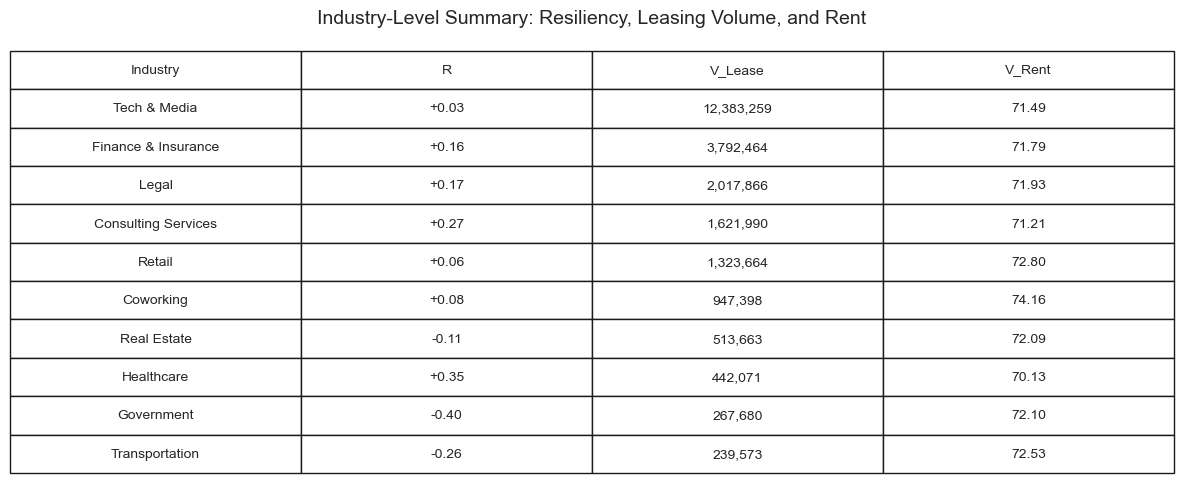

In [1443]:
import pandas as pd
import matplotlib.pyplot as plt

# Data as provided
data = {
    'Industry': [
        'Tech & Media', 'Finance & Insurance', 'Legal', 'Consulting Services',
        'Retail', 'Coworking', 'Real Estate', 'Healthcare', 'Government', 'Transportation'
    ],
    'R': [0.03, 0.16, 0.17, 0.27, 0.06, 0.08, -0.11, 0.35, -0.40, -0.26],
    'V_Lease': [
        12383259, 3792464, 2017866, 1621990, 1323664, 947398, 
        513663, 442071, 267680, 239573
    ],
    'V_Rent': [71.49, 71.79, 71.93, 71.21, 72.80, 74.16, 72.09, 70.13, 72.10, 72.53]
}

# Create DataFrame
df = pd.DataFrame(data)

# Format columns for display
df['R'] = df['R'].map('{:+.2f}'.format)
df['V_Lease'] = df['V_Lease'].map('{:,.0f}'.format)
df['V_Rent'] = df['V_Rent'].map('{:.2f}'.format)

# Plot the visual table
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')

# Draw the table
table = plt.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

table.auto_set_font_size(False)
table.set_fontsize(10)

plt.title("Industry-Level Summary: Resiliency, Leasing Volume, and Rent", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



TypeError: text() missing 1 required positional argument: 's'

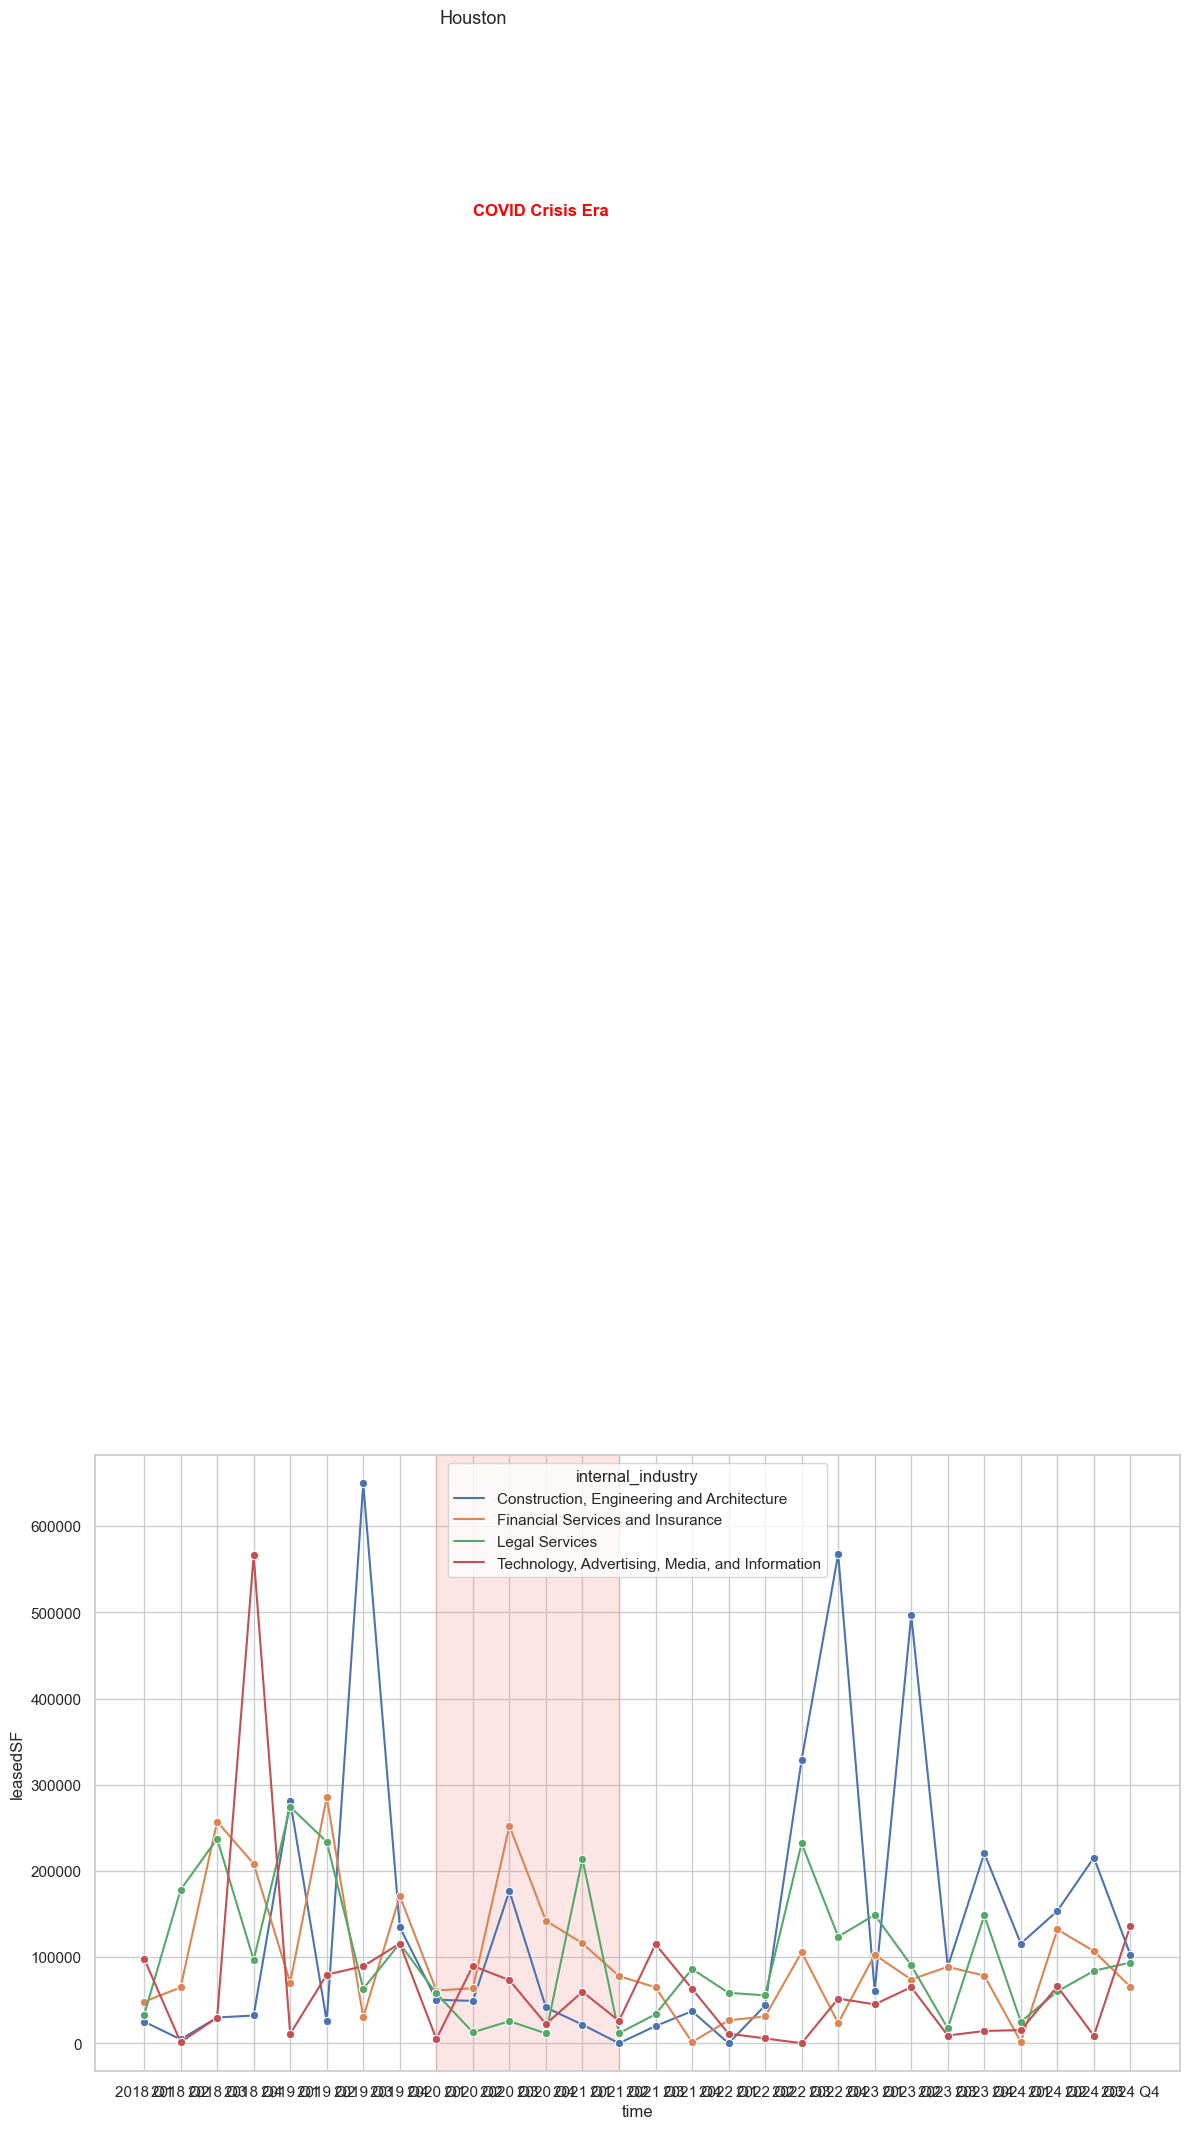

In [1480]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set market
market_name = "Houston"

# Filter for valid industries and quarters
df_market = Leases_df[
    (Leases_df["market"] == market_name) &
    (Leases_df["internal_industry"].notna()) &
    (Leases_df["quarter"].isin(["Q1", "Q2", "Q3", "Q4"]))
].copy()

# Create time axis
df_market['time'] = df_market['year'].astype(str) + ' ' + df_market['quarter']
df_market['time'] = pd.Categorical(
    df_market['time'],
    categories=sorted(df_market['time'].unique(), key=lambda x: (int(x.split()[0]), x.split()[1])),
    ordered=True
)

# Aggregate leased SF
df_plot = df_market.groupby(['time', 'internal_industry'])['leasedSF'].sum().reset_index()

# Summary statistics
summary = df_market.groupby('internal_industry').agg(
    R=('leasedSF', lambda x: x.corr(df_market.loc[x.index, 'overall_rent'])),
    V_Lease=('leasedSF', 'sum'),
    V_Rent=('overall_rent', 'mean')
).dropna().round(2).sort_values('V_Lease', ascending=False)

# Remove "Energy & Utilities" and select top industries
summary = summary[summary.index != "Energy & Utilities"]
top_industries = summary.head(4).index.tolist()
df_plot_top = df_plot[df_plot['internal_industry'].isin(top_industries)]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot_top, x='time', y='leasedSF', hue='internal_industry', marker='o')

# COVID annotation
plt.axvspan('2020 Q1', '2021 Q2', color='lightcoral', alpha=0.2)
plt.text('2020 Q2', df_plot['leasedSF'].max() * 0.95, "COVID Crisis Era", color='red', fontsize=12, weight='bold')
plt.text('2020 Q2', df_plot['leasedSF'].max() * 1.05, market_name, ha='center', fontsize=13)

# Industry annotations
label_spacing = 100000
y_offset = 0
for industry in top_industries:
    ind_data = summary.loc[industry]
    industry_df = df_plot_top[df_plot_top['internal_industry'] == industry]
    y_val = industry_df['leasedSF'].iloc[-1] + y_offset
    plt.text(
        len(df_plot['time'].unique()) + 0.5,
        y_val,
        fontsize=9,
        va='center'
    )
    y_offset -= label_spacing

# Final formatting
plt.title(f"{market_name} - Quarterly Leasing Trends by Industry (Excl. Energy)", fontsize=16)
plt.ylabel("Leased Sq Ft")
plt.xlabel("Quarter")
plt.ylim(top=1.4e6)  # Set max y-axis scale
plt.xticks(rotation=45, ha='right')
plt.legend(title="Industry", loc='upper left')
plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



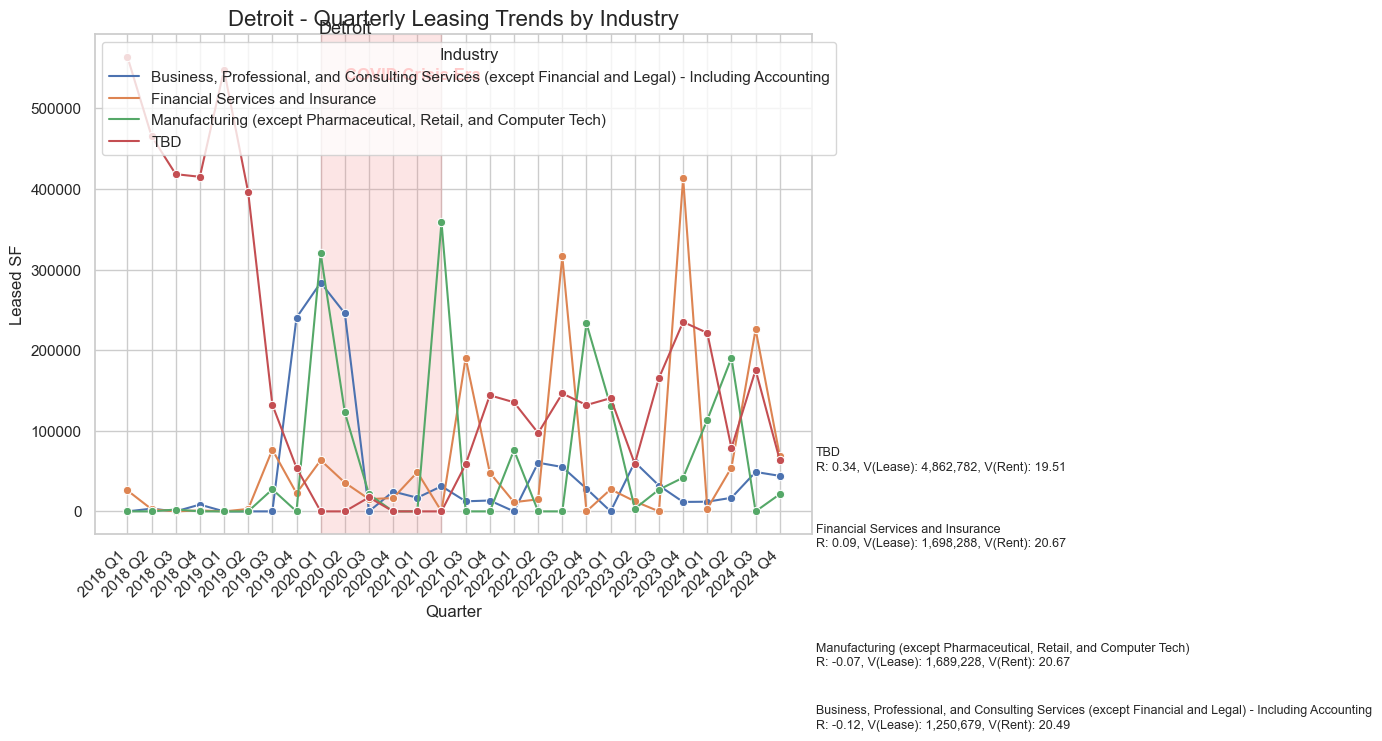

Summary Stats per Industry:
                                                                                                        R    V_Lease  V_Rent
internal_industry                                                                                                           
TBD                                                                                                  0.34 4862782.00   19.51
Financial Services and Insurance                                                                     0.09 1698288.00   20.67
Manufacturing (except Pharmaceutical, Retail, and Computer Tech)                                    -0.07 1689228.00   20.67
Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting -0.12 1250679.00   20.49
Technology, Advertising, Media, and Information                                                     -0.08  806525.00   20.59
Construction, Engineering and Architecture                                                       

In [1470]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set market
market_name = "Detroit"

# --- Filter for city and valid industries
df_market = Leases_df[
    (Leases_df["market"] == market_name) &
    (Leases_df["internal_industry"].notna()) &
    (Leases_df["quarter"].isin(["Q1", "Q2", "Q3", "Q4"]))  # ensure clean quarters
].copy()

# --- Create valid time axis from year + quarter
df_market['time'] = df_market['year'].astype(str) + ' ' + df_market['quarter']
df_market['time'] = pd.Categorical(
    df_market['time'],
    categories=sorted(df_market['time'].unique(), key=lambda x: (int(x.split()[0]), x.split()[1])),
    ordered=True
)

# --- Aggregate leased SF by time and industry
df_plot = df_market.groupby(['time', 'internal_industry'])['leasedSF'].sum().reset_index()

# --- Calculate summary stats: correlation, volume, rent
summary = df_market.groupby('internal_industry').agg(
    R=('leasedSF', lambda x: x.corr(df_market.loc[x.index, 'overall_rent'])),
    V_Lease=('leasedSF', 'sum'),
    V_Rent=('overall_rent', 'mean')
).dropna().round(2).sort_values('V_Lease', ascending=False)

# --- Pick top 4 industries by lease volume
top_industries = summary.head(4).index.tolist()
df_plot_top = df_plot[df_plot['internal_industry'].isin(top_industries)]

# --- Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot_top, x='time', y='leasedSF', hue='internal_industry', marker='o')

# --- COVID annotation
plt.axvspan('2020 Q1', '2021 Q2', color='lightcoral', alpha=0.2)
plt.text('2020 Q2', df_plot['leasedSF'].max() * 0.95, "COVID Crisis Era", color='red', fontsize=12, weight='bold')
plt.text('2020 Q2', df_plot['leasedSF'].max() * 1.05, market_name, ha='center', fontsize=13)

# --- Annotate last values with R, V(Lease), V(Rent)
label_spacing = 100000
y_offset = 0

for industry in top_industries:
    ind_data = summary.loc[industry]
    industry_df = df_plot_top[df_plot_top['internal_industry'] == industry]
    y_val = industry_df['leasedSF'].iloc[-1] + y_offset

    plt.text(
        len(df_plot['time'].unique()) + 0.5,
        y_val,
        f"{industry}\nR: {ind_data.R:.2f}, V(Lease): {int(ind_data.V_Lease):,}, V(Rent): {ind_data.V_Rent:.2f}",
        fontsize=9,
        va='center'
    )
    
    y_offset -= label_spacing

# --- Final touches
plt.title(f"{market_name} - Quarterly Leasing Trends by Industry", fontsize=16)
plt.ylabel("Leased SF")
plt.xlabel("Quarter")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Industry", loc='upper left')
plt.tight_layout()
plt.show()

# --- Print summary table
print("Summary Stats per Industry:")
print(summary.head(10).to_string())


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

invalid value encountered in multiply



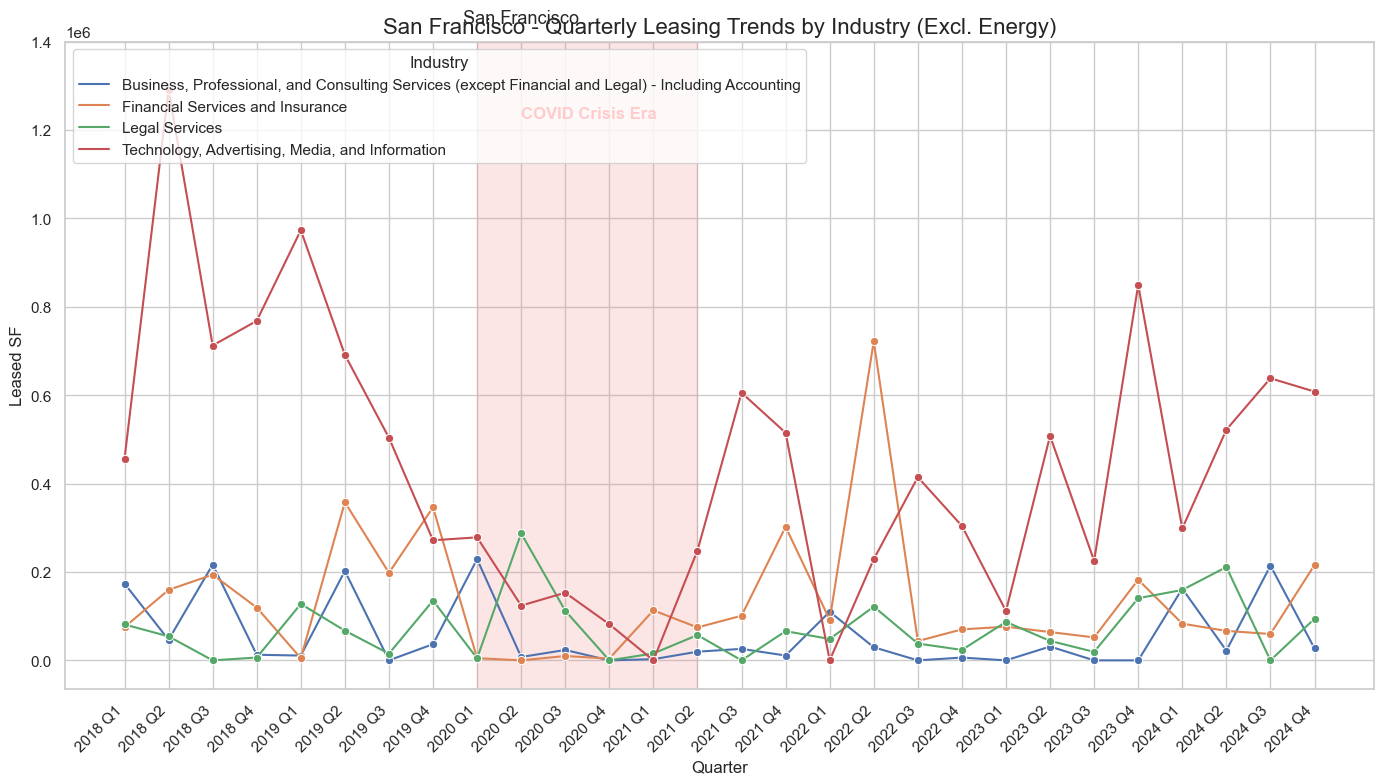

Summary Stats per Industry:
                                                                                                        R     V_Lease  V_Rent
internal_industry                                                                                                            
Technology, Advertising, Media, and Information                                                      0.03 12383259.00   71.49
Financial Services and Insurance                                                                     0.16  3792464.00   71.79
Legal Services                                                                                       0.17  2017866.00   71.93
Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting  0.27  1621990.00   71.21
Retail                                                                                               0.06  1323664.00   72.80
Coworking and Executive Suite Companies                                                   

In [1476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set market
market_name = "San Francisco"

# --- Filter for city and valid industries
df_market = Leases_df[
    (Leases_df["market"] == market_name) &
    (Leases_df["internal_industry"].notna()) &
    (Leases_df["quarter"].isin(["Q1", "Q2", "Q3", "Q4"]))
].copy()

# --- Create valid time axis
df_market['time'] = df_market['year'].astype(str) + ' ' + df_market['quarter']
df_market['time'] = pd.Categorical(
    df_market['time'],
    categories=sorted(df_market['time'].unique(), key=lambda x: (int(x.split()[0]), x.split()[1])),
    ordered=True
)

# --- Aggregate leased SF
df_plot = df_market.groupby(['time', 'internal_industry'])['leasedSF'].sum().reset_index()

# --- Summary stats
summary = df_market.groupby('internal_industry').agg(
    R=('leasedSF', lambda x: x.corr(df_market.loc[x.index, 'overall_rent'])),
    V_Lease=('leasedSF', 'sum'),
    V_Rent=('overall_rent', 'mean')
).dropna().round(2).sort_values('V_Lease', ascending=False)

# --- Remove Energy from analysis
summary = summary[summary.index != "Energy & Utilities"]

# --- Pick top 4 by leasing volume (excluding energy)
top_industries = summary.head(4).index.tolist()
df_plot_top = df_plot[df_plot['internal_industry'].isin(top_industries)]

# --- Plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_plot_top,
    x='time',
    y='leasedSF',
    hue='internal_industry',
    marker='o'
)

# --- COVID annotation
plt.axvspan('2020 Q1', '2021 Q2', color='lightcoral', alpha=0.2)
plt.text('2020 Q2', df_plot['leasedSF'].max()*0.95, "COVID Crisis Era", color='red', fontsize=12, weight='bold')
plt.text('2020 Q2', 1.4e6 * 1.03, market_name, ha='center', fontsize=13)

# --- Add annotations
label_spacing = 100000
y_offset = 0

for industry in top_industries:
    ind_data = summary.loc[industry]
    industry_df = df_plot_top[df_plot_top['internal_industry'] == industry]
    y_val = industry_df['leasedSF'].iloc[-1] + y_offset

   
    y_offset -= label_spacing

# --- Final formatting
plt.title(f"{market_name} - Quarterly Leasing Trends by Industry (Excl. Energy)", fontsize=16)
plt.ylabel("Leased SF")
plt.xlabel("Quarter")
plt.ylim(top=1.4e6)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Industry", loc='upper left')
plt.tight_layout()
plt.show()

# --- Print summary table
print("Summary Stats per Industry:")
print(summary.head(10).to_string())

